In [153]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline

In [3]:
efi_df = pd.read_csv('efi2019_save.csv', engine='python')
efi_df.sort_values('World Rank', inplace = True, na_position='first')  
efi_df = efi_df[6:]
efi_df.drop(88, inplace = True)
efi_df.sort_values('2019 Score', ascending = False)

efi_df['GDP per Capita (PPP)'] = efi_df['GDP per Capita (PPP)'].str.replace(',', '')
efi_df['GDP per Capita (PPP)'] = efi_df['GDP per Capita (PPP)'].str.replace('$', '')

efi_df['GDP (Billions, PPP)'] = efi_df['GDP (Billions, PPP)'].str.replace(',', '')
efi_df['GDP (Billions, PPP)'] = efi_df['GDP (Billions, PPP)'].str.replace('$', '')

efi_df = efi_df.astype({'Population (Millions)': np.float})
efi_df = efi_df.astype({'GDP (Billions, PPP)': np.float})
efi_df = efi_df.astype({'GDP per Capita (PPP)': np.float})

efi_df.sort_values('FDI Inflow (Millions)', na_position='first')  
efi_df.drop([113,42], inplace = True)

efi_df.sort_values('Unemployment (%)', na_position='first') 
efi_df.drop([90,47,147,87], inplace = True)

efi_df.sort_values('2019 Score', na_position='first') 
efi_df = efi_df.astype({'Unemployment (%)': np.float})

efi_df['FDI Inflow (Millions)'] = efi_df['FDI Inflow (Millions)'].str.replace(',', '')
efi_df = efi_df.astype({'FDI Inflow (Millions)': np.float})

efi_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 173 entries, 72 to 181
Data columns (total 34 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CountryID                    173 non-null    int64  
 1   Country Name                 173 non-null    object 
 2   WEBNAME                      173 non-null    object 
 3   Region                       173 non-null    object 
 4   World Rank                   173 non-null    float64
 5   Region Rank                  173 non-null    float64
 6   2019 Score                   173 non-null    float64
 7   Property Rights              173 non-null    float64
 8   Judical Effectiveness        173 non-null    float64
 9   Government Integrity         173 non-null    float64
 10  Tax Burden                   173 non-null    float64
 11  Gov't Spending               173 non-null    float64
 12  Fiscal Health                173 non-null    float64
 13  Business Freedom   

In [ ]:
# I need to group the df by Region. 

# Bubble Plot, Population, Region, GDP, Score

#

In [45]:
np.unique(efi_df['Region'])

array(['Americas', 'Asia-Pacific', 'Europe',
       'Middle East and North Africa', 'Sub-Saharan Africa'], dtype=object)

In [4]:
efi_df.describe()

,CountryID,World Rank,Region Rank,2019 Score,Property Rights,Judical Effectiveness,Government Integrity,Tax Burden,Gov't Spending,Fiscal Health,...,Gov't Expenditure % of GDP,Population (Millions),"GDP (Billions, PPP)",GDP Growth Rate (%),5 Year GDP Growth Rate (%),GDP per Capita (PPP),Unemployment (%),Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP)
count,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,...,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,91.872832,89.046243,20.219653,61.349133,53.561850,46.045087,42.284393,77.704046,66.019075,66.811561,...,32.023121,42.091908,728.858960,3.290751,3.171676,21277.000000,7.332370,10.869942,8303.802312,56.667052
std,53.867473,51.636567,12.623265,10.290731,19.229243,17.651070,19.925058,11.786874,20.957233,30.813333,...,10.387187,149.902308,2486.265777,2.748959,2.467099,22740.404502,5.678334,82.555305,26513.639200,33.854417
min,1.000000,1.000000,1.000000,25.900000,7.600000,12.300000,7.900000,42.000000,0.900000,0.000000,...,10.600000,0.100000,0.600000,-14.000000,-7.800000,677.000000,0.100000,-0.900000,-8296.900000,0.000000
25%,45.000000,44.000000,9.000000,54.600000,37.400000,32.300000,28.100000,71.000000,54.100000,42.500000,...,23.600000,2.800000,27.500000,2.000000,2.000000,4586.000000,3.700000,1.300000,277.100000,35.200000
50%,92.000000,90.000000,19.000000,60.800000,52.400000,44.000000,36.400000,78.600000,70.000000,80.300000,...,31.600000,8.800000,88.700000,3.200000,3.100000,12811.000000,5.600000,2.800000,1070.700000,50.400000
75%,138.000000,133.000000,30.000000,68.100000,66.000000,56.000000,50.500000,85.400000,83.300000,90.100000,...,39.100000,31.400000,439.600000,4.800000,4.500000,31139.000000,9.300000,5.500000,4633.700000,70.200000
max,186.000000,179.000000,47.000000,90.200000,97.400000,92.400000,96.700000,99.800000,96.600000,100.000000,...,57.500000,1390.100000,23159.100000,10.900000,9.900000,124529.000000,27.300000,1087.500000,275381.000000,236.400000


In [5]:
efi_df.corr()

,CountryID,World Rank,Region Rank,2019 Score,Property Rights,Judical Effectiveness,Government Integrity,Tax Burden,Gov't Spending,Fiscal Health,...,Gov't Expenditure % of GDP,Population (Millions),"GDP (Billions, PPP)",GDP Growth Rate (%),5 Year GDP Growth Rate (%),GDP per Capita (PPP),Unemployment (%),Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP)
CountryID,1.000000,-0.024322,-0.017059,0.018444,0.100653,0.056725,0.061168,0.097138,-0.001746,-0.054788,...,0.015341,-0.053994,0.015568,-0.057202,0.014213,0.098060,-0.035205,0.121893,0.045926,-0.083345
World Rank,-0.024322,1.000000,0.731422,-0.970512,-0.866212,-0.774972,-0.785248,0.092127,0.181947,-0.559045,...,-0.193403,0.055543,-0.114131,-0.099060,0.012766,-0.642064,0.075754,0.163444,-0.248685,0.039437
Region Rank,-0.017059,0.731422,1.000000,-0.728599,-0.556667,-0.598854,-0.581850,-0.040558,-0.131266,-0.310658,...,0.107802,0.032290,-0.085825,-0.049920,-0.088811,-0.443978,0.103673,0.091154,-0.197653,0.103923
2019 Score,0.018444,-0.970512,-0.728599,1.000000,0.876601,0.805825,0.818174,-0.075163,-0.140741,0.559395,...,0.146834,-0.047871,0.112114,0.175203,0.054537,0.649518,-0.094606,-0.289397,0.292204,-0.052918
Property Rights,0.100653,-0.866212,-0.556667,0.876601,1.000000,0.826805,0.866998,-0.223515,-0.409670,0.329969,...,0.420970,-0.000679,0.159539,0.067604,-0.065005,0.692906,-0.090597,-0.208512,0.301301,0.094380
Judical Effectiveness,0.056725,-0.774972,-0.598854,0.805825,0.826805,1.000000,0.888880,-0.245655,-0.290839,0.287380,...,0.297631,0.150446,0.289566,0.041256,-0.052041,0.649592,-0.028315,-0.162887,0.375667,0.074229
Government Integrity,0.061168,-0.785248,-0.581850,0.818174,0.866998,0.888880,1.000000,-0.286403,-0.400868,0.292240,...,0.398067,0.024014,0.191905,-0.007990,-0.062151,0.708315,-0.076754,-0.153959,0.331880,0.106947
Tax Burden,0.097138,0.092127,-0.040558,-0.075163,-0.223515,-0.245655,-0.286403,1.000000,0.347073,-0.097799,...,-0.311334,-0.042203,-0.102660,0.132233,0.213881,-0.092750,-0.149296,-0.010461,-0.101983,-0.234556
Gov't Spending,-0.001746,0.181947,-0.131266,-0.140741,-0.409670,-0.290839,-0.400868,0.347073,1.000000,0.046773,...,-0.983534,0.083692,-0.044007,0.293568,0.333101,-0.348762,-0.145129,-0.010427,-0.042557,-0.159959
Fiscal Health,-0.054788,-0.559045,-0.310658,0.559395,0.329969,0.287380,0.292240,-0.097799,0.046773,1.000000,...,-0.085589,-0.075276,-0.018728,0.219698,0.098731,0.241601,-0.124266,-0.132109,0.036783,-0.311699


In [198]:
gdp_perc = np.percentile(efi_df['GDP per Capita (PPP)'].values, [66, 33])

cat_lst = ['high', 'middle', 'low']

efi_df['GDP Category'] = efi_df['GDP per Capita (PPP)'].apply(lambda x: cat_lst[2] if x < gdp_perc[1] else (cat_lst[1] if x < gdp_perc[0] else cat_lst[0]))



In [199]:
prop_perc = np.percentile(efi_df['Property Rights'].values, [66, 33])
efi_df['Property Category'] = efi_df['Property Rights'].apply(lambda x: cat_lst[2] if x < prop_perc[1] else (cat_lst[1] if x < prop_perc[0] else cat_lst[0]))

In [573]:
efi_df.tail(10)

,CountryID,Country Name,WEBNAME,Region,World Rank,Region Rank,2019 Score,Property Rights,Judical Effectiveness,Government Integrity,...,"GDP (Billions, PPP)",GDP Growth Rate (%),5 Year GDP Growth Rate (%),GDP per Capita (PPP),Unemployment (%),Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP),GDP Category,Property Category
46,46,Djibouti,Djibouti,Sub-Saharan Africa,169.0,43.0,47.1,29.7,18.1,28.1,...,3.6,6.7,6.1,3559.0,5.8,0.7,165.0,30.6,low,low
49,49,Ecuador,Ecuador,Americas,170.0,29.0,46.9,35.9,20.2,25.3,...,192.6,2.7,2.0,11482.0,3.8,0.4,606.4,45.0,middle,low
2,3,Algeria,Algeria,Middle East and North Africa,171.0,14.0,46.2,31.6,36.2,28.9,...,632.9,2.0,3.1,15237.0,10.0,5.6,1203.0,25.8,middle,low
166,164,Timor-Leste,TimorLeste,Asia-Pacific,172.0,42.0,44.2,29.7,13.1,32.1,...,6.8,-0.5,3.1,5444.0,3.4,0.6,6.7,0.0,low,low
18,19,Bolivia,Bolivia,Americas,173.0,30.0,42.3,20.5,12.3,19.7,...,83.6,4.2,5.1,7547.0,3.1,2.8,724.7,50.9,middle,low
52,52,Equatorial Guinea,EquatorialGuinea,Sub-Saharan Africa,174.0,44.0,41.0,29.7,18.1,15.8,...,30.4,-4.4,-5.6,36017.0,6.9,0.7,304.1,42.7,high,low
185,183,Zimbabwe,Zimbabwe,Sub-Saharan Africa,175.0,45.0,40.4,29.7,24.8,15.8,...,34.0,3.0,2.6,2283.0,5.0,1.3,289.4,78.4,low,low
38,38,"Congo, Republic of",RepublicCongo,Sub-Saharan Africa,176.0,46.0,39.7,33.2,29.6,25.3,...,28.9,-4.6,1.1,6642.0,11.0,0.5,1158.8,119.1,low,low
53,53,Eritrea,Eritrea,Sub-Saharan Africa,177.0,47.0,38.9,35.5,18.1,19.7,...,9.4,5.0,3.4,1581.0,6.4,9.0,55.5,131.2,low,low
181,179,Venezuela,Venezuela,Americas,179.0,32.0,25.9,7.6,13.1,7.9,...,380.7,-14.0,-7.8,12114.0,7.7,1087.5,-68.0,34.9,middle,low


In [567]:
efi_df.corr()

,CountryID,World Rank,Region Rank,2019 Score,Property Rights,Judical Effectiveness,Government Integrity,Tax Burden,Gov't Spending,Fiscal Health,...,Gov't Expenditure % of GDP,Population (Millions),"GDP (Billions, PPP)",GDP Growth Rate (%),5 Year GDP Growth Rate (%),GDP per Capita (PPP),Unemployment (%),Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP)
CountryID,1.000000,-0.024322,-0.017059,0.018444,0.100653,0.056725,0.061168,0.097138,-0.001746,-0.054788,...,0.015341,-0.053994,0.015568,-0.057202,0.014213,0.098060,-0.035205,0.121893,0.045926,-0.083345
World Rank,-0.024322,1.000000,0.731422,-0.970512,-0.866212,-0.774972,-0.785248,0.092127,0.181947,-0.559045,...,-0.193403,0.055543,-0.114131,-0.099060,0.012766,-0.642064,0.075754,0.163444,-0.248685,0.039437
Region Rank,-0.017059,0.731422,1.000000,-0.728599,-0.556667,-0.598854,-0.581850,-0.040558,-0.131266,-0.310658,...,0.107802,0.032290,-0.085825,-0.049920,-0.088811,-0.443978,0.103673,0.091154,-0.197653,0.103923
2019 Score,0.018444,-0.970512,-0.728599,1.000000,0.876601,0.805825,0.818174,-0.075163,-0.140741,0.559395,...,0.146834,-0.047871,0.112114,0.175203,0.054537,0.649518,-0.094606,-0.289397,0.292204,-0.052918
Property Rights,0.100653,-0.866212,-0.556667,0.876601,1.000000,0.826805,0.866998,-0.223515,-0.409670,0.329969,...,0.420970,-0.000679,0.159539,0.067604,-0.065005,0.692906,-0.090597,-0.208512,0.301301,0.094380
Judical Effectiveness,0.056725,-0.774972,-0.598854,0.805825,0.826805,1.000000,0.888880,-0.245655,-0.290839,0.287380,...,0.297631,0.150446,0.289566,0.041256,-0.052041,0.649592,-0.028315,-0.162887,0.375667,0.074229
Government Integrity,0.061168,-0.785248,-0.581850,0.818174,0.866998,0.888880,1.000000,-0.286403,-0.400868,0.292240,...,0.398067,0.024014,0.191905,-0.007990,-0.062151,0.708315,-0.076754,-0.153959,0.331880,0.106947
Tax Burden,0.097138,0.092127,-0.040558,-0.075163,-0.223515,-0.245655,-0.286403,1.000000,0.347073,-0.097799,...,-0.311334,-0.042203,-0.102660,0.132233,0.213881,-0.092750,-0.149296,-0.010461,-0.101983,-0.234556
Gov't Spending,-0.001746,0.181947,-0.131266,-0.140741,-0.409670,-0.290839,-0.400868,0.347073,1.000000,0.046773,...,-0.983534,0.083692,-0.044007,0.293568,0.333101,-0.348762,-0.145129,-0.010427,-0.042557,-0.159959
Fiscal Health,-0.054788,-0.559045,-0.310658,0.559395,0.329969,0.287380,0.292240,-0.097799,0.046773,1.000000,...,-0.085589,-0.075276,-0.018728,0.219698,0.098731,0.241601,-0.124266,-0.132109,0.036783,-0.311699


Text(0, 0.5, '2019 Score')

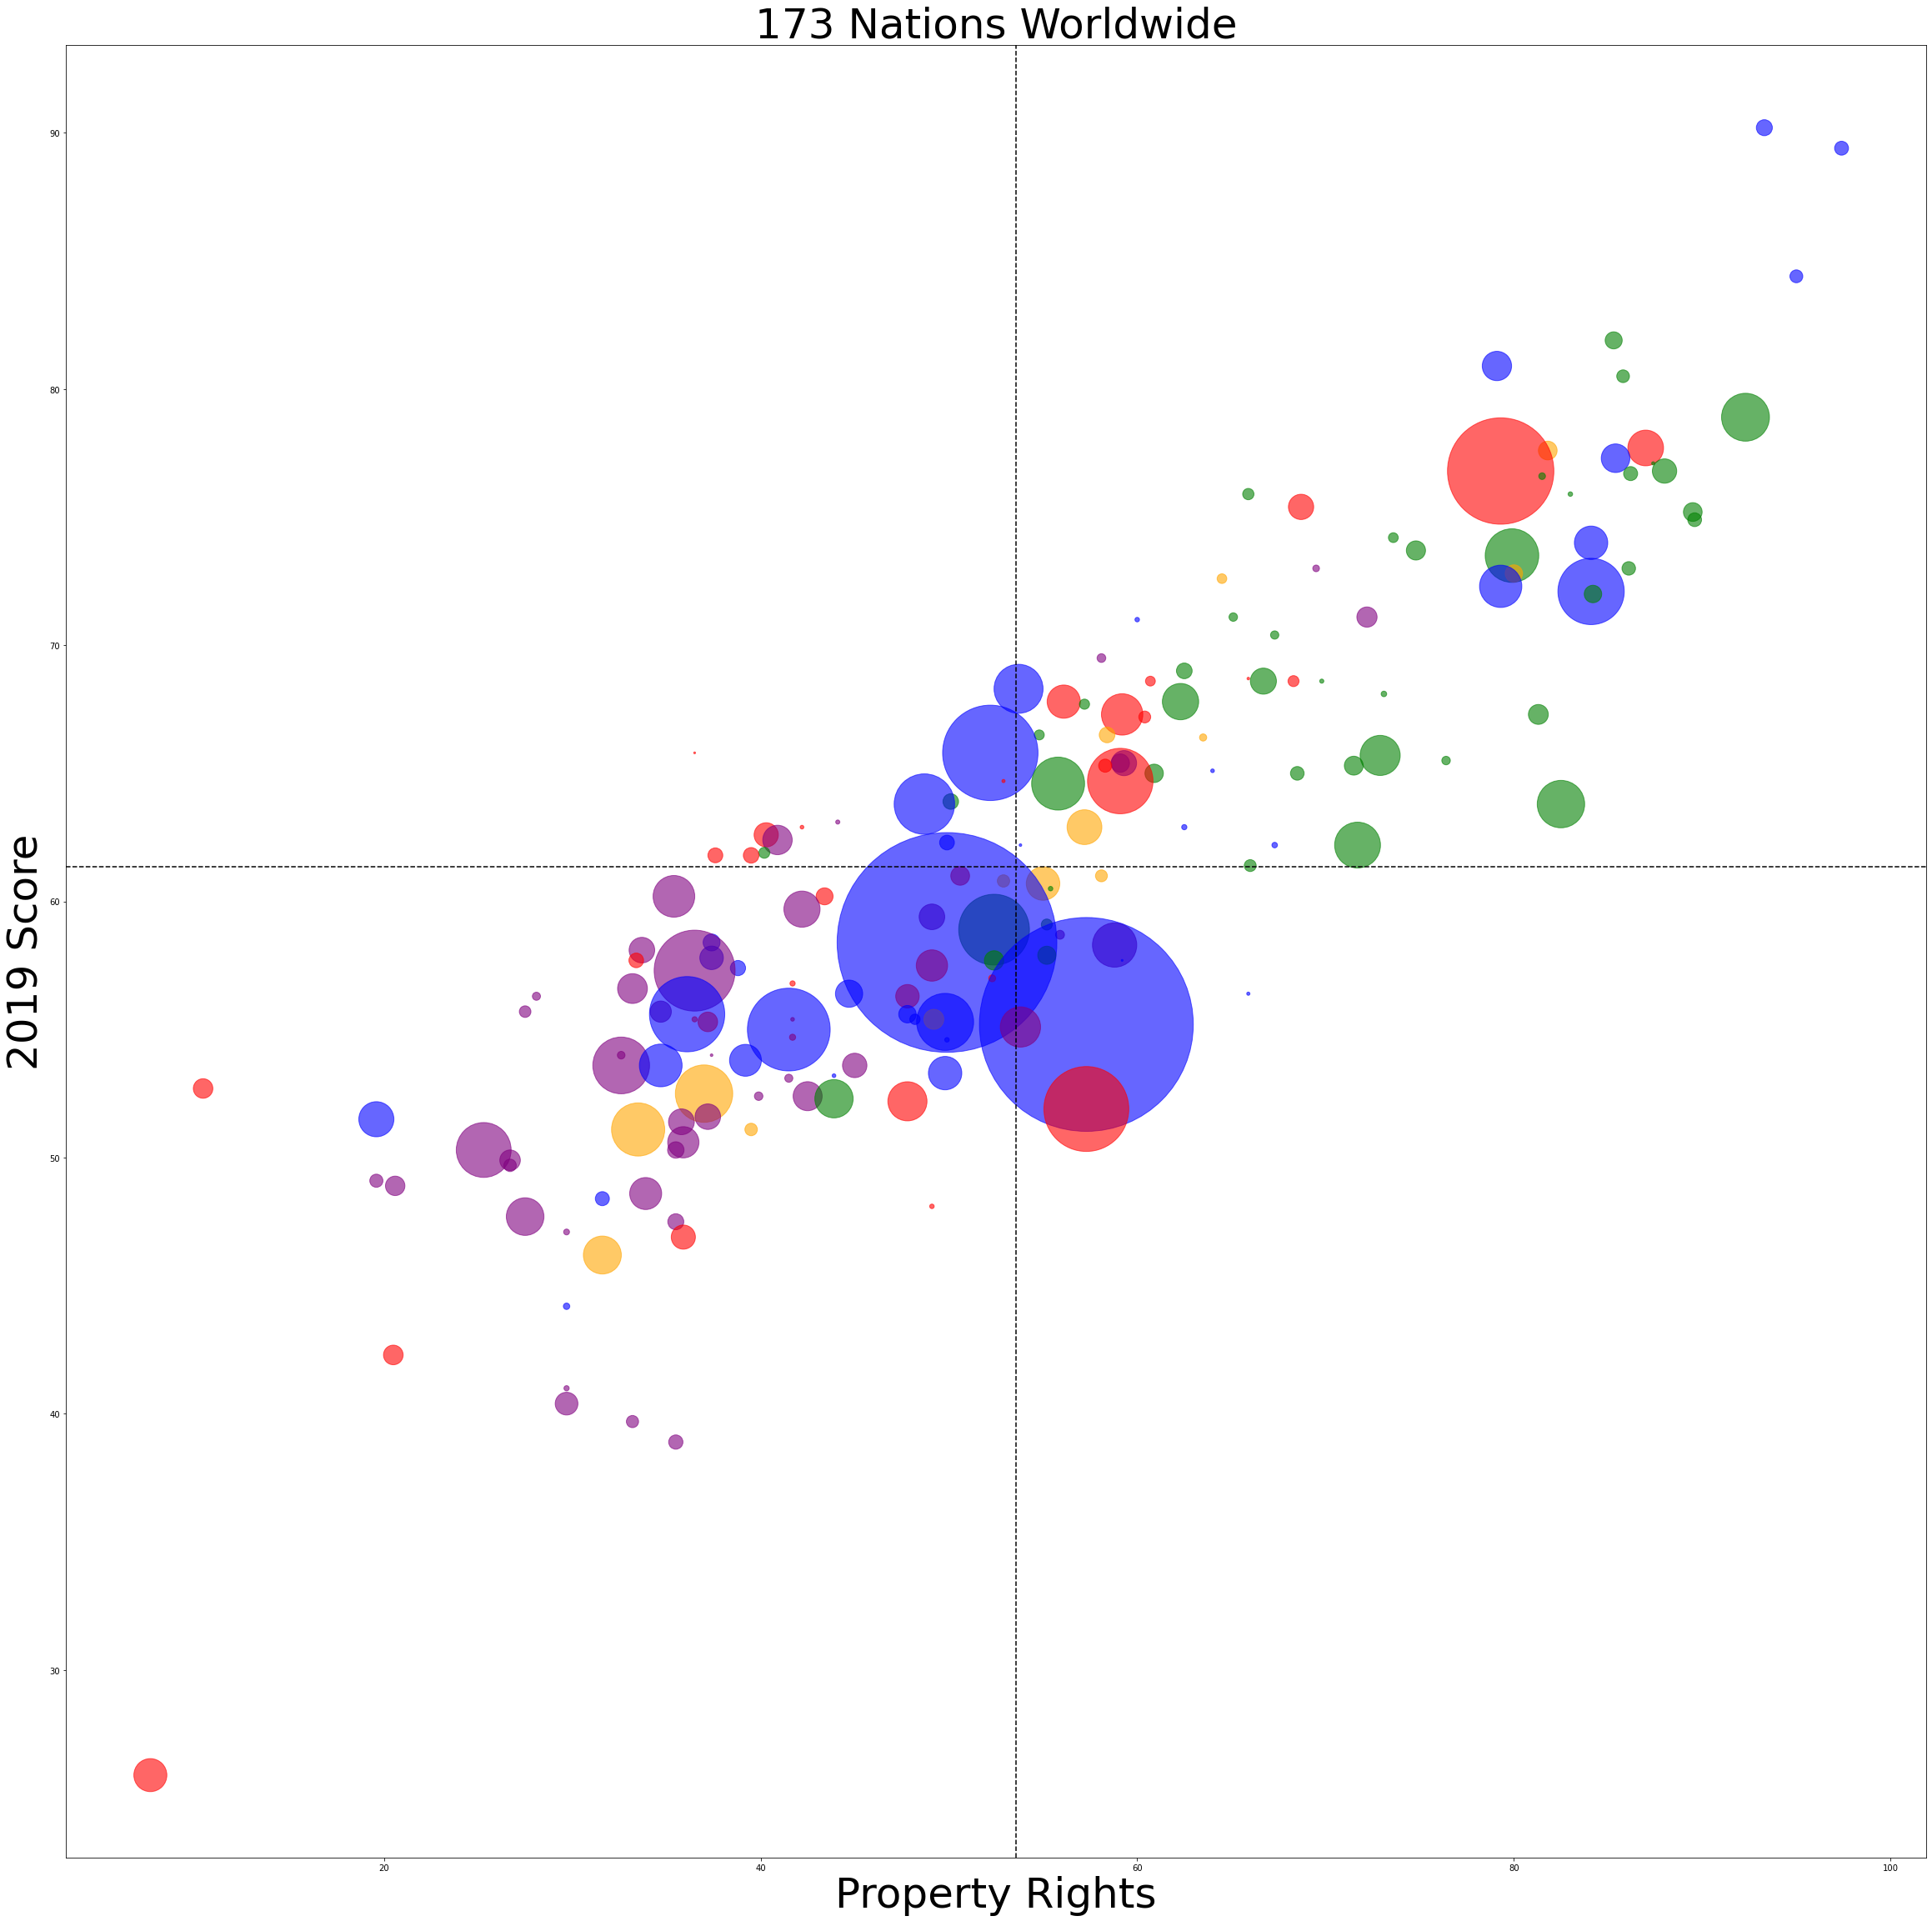

In [622]:
plt.figure(figsize=(40,40))

colors = {'Americas':'red', 'Europe':'green', 'Asia-Pacific':'blue', 'Middle East and North Africa': 'orange','Sub-Saharan Africa': 'purple'}

axes= plt.axes()
#axes.grid()

plt.scatter('Property Rights', '2019 Score',
             s=(efi_df['Population (Millions)'] *50), 
             c = efi_df['Region'].map(colors),
             alpha= 0.6,
             data=efi_df)
plt.axhline(y = efi_df['2019 Score'].mean(), color = 'black', linestyle = 'dashed')

plt.axvline(x = efi_df['Property Rights'].mean(), color = 'black', linestyle = 'dashed')

plt.title('173 Nations Worldwide', fontsize = 50)
plt.xlabel('Property Rights', fontsize = 50)
plt.ylabel('2019 Score', fontsize = 50)


Text(0, 0.5, '2019 Score')

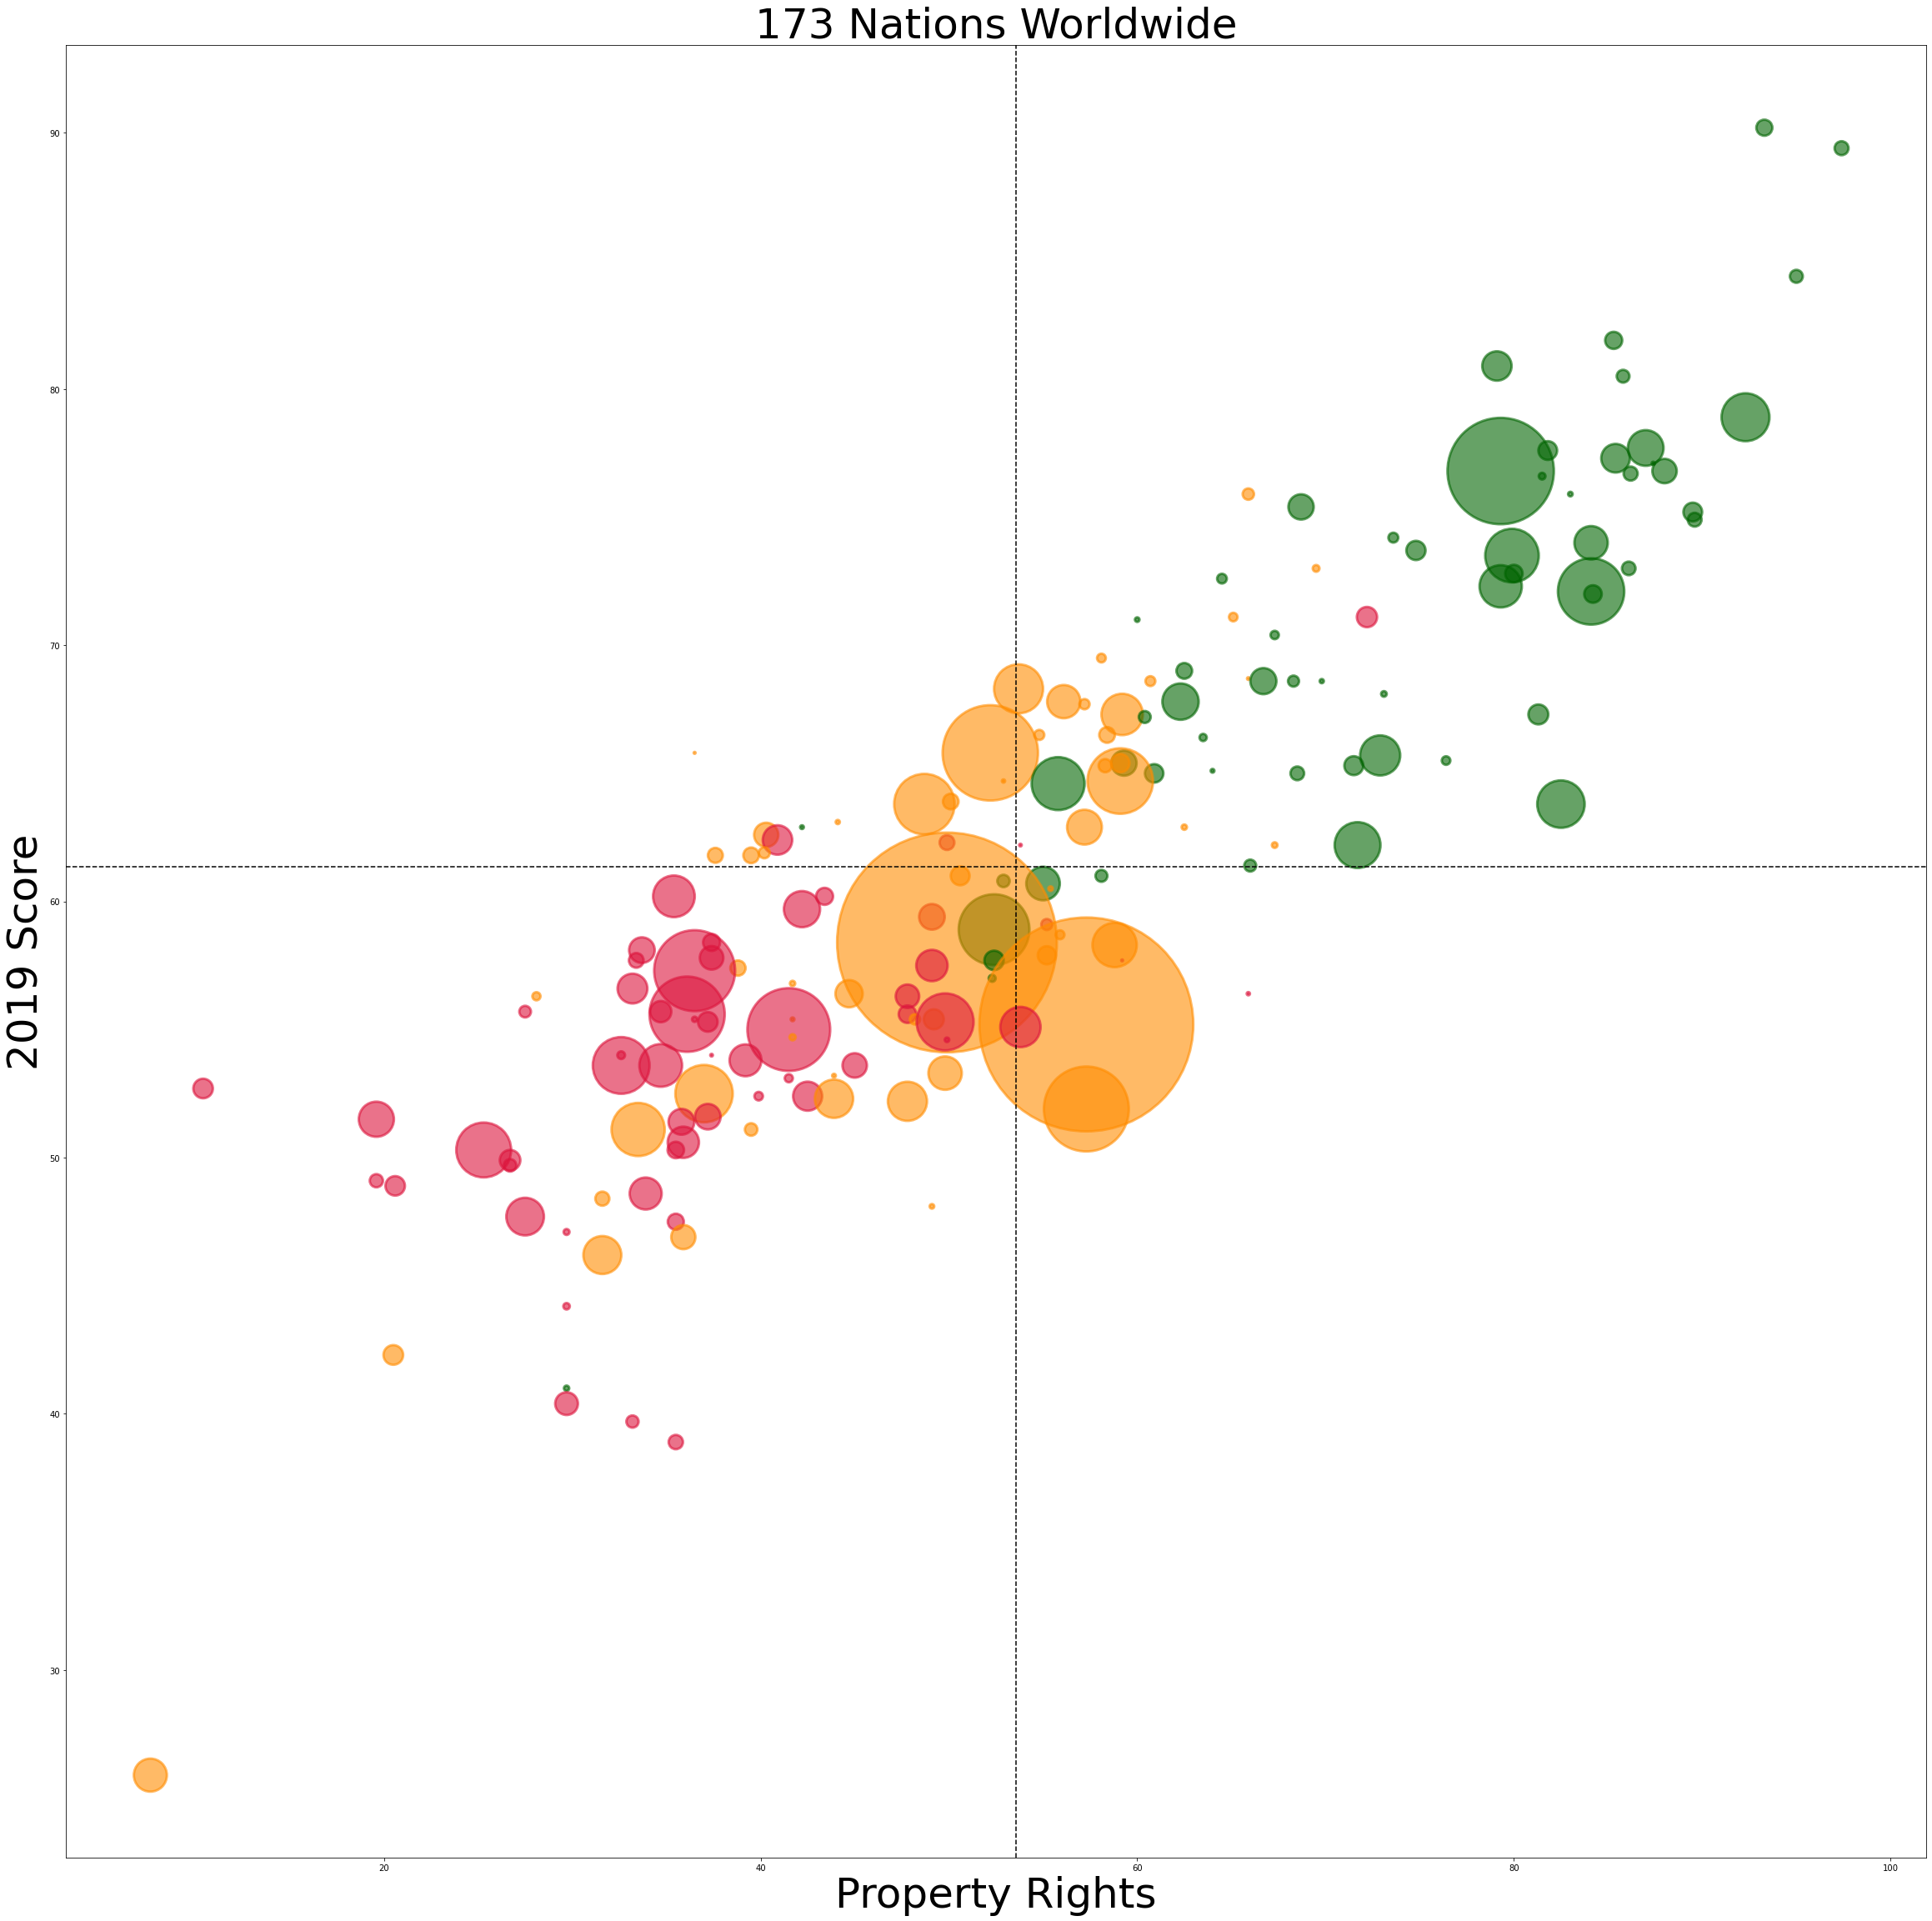

In [540]:
plt.figure(figsize=(40,40))

colors = {'high': 'darkgreen', 'middle': 'darkorange', 'low': 'crimson'}

axes= plt.axes()
#axes.grid()


plt.scatter('Property Rights', '2019 Score',
             s=(efi_df['Population (Millions)'] *50), 
             c = efi_df['GDP Category'].map(colors), linewidths=3,
             alpha= 0.6,
             data=efi_df)
plt.axhline(y = efi_df['2019 Score'].mean(), color = 'black', linestyle = 'dashed')

plt.axvline(x = efi_df['Property Rights'].mean(), color = 'black', linestyle = 'dashed')

plt.title('173 Nations Worldwide', fontsize = 50)
plt.xlabel('Property Rights', fontsize = 50)
plt.ylabel('2019 Score', fontsize = 50)

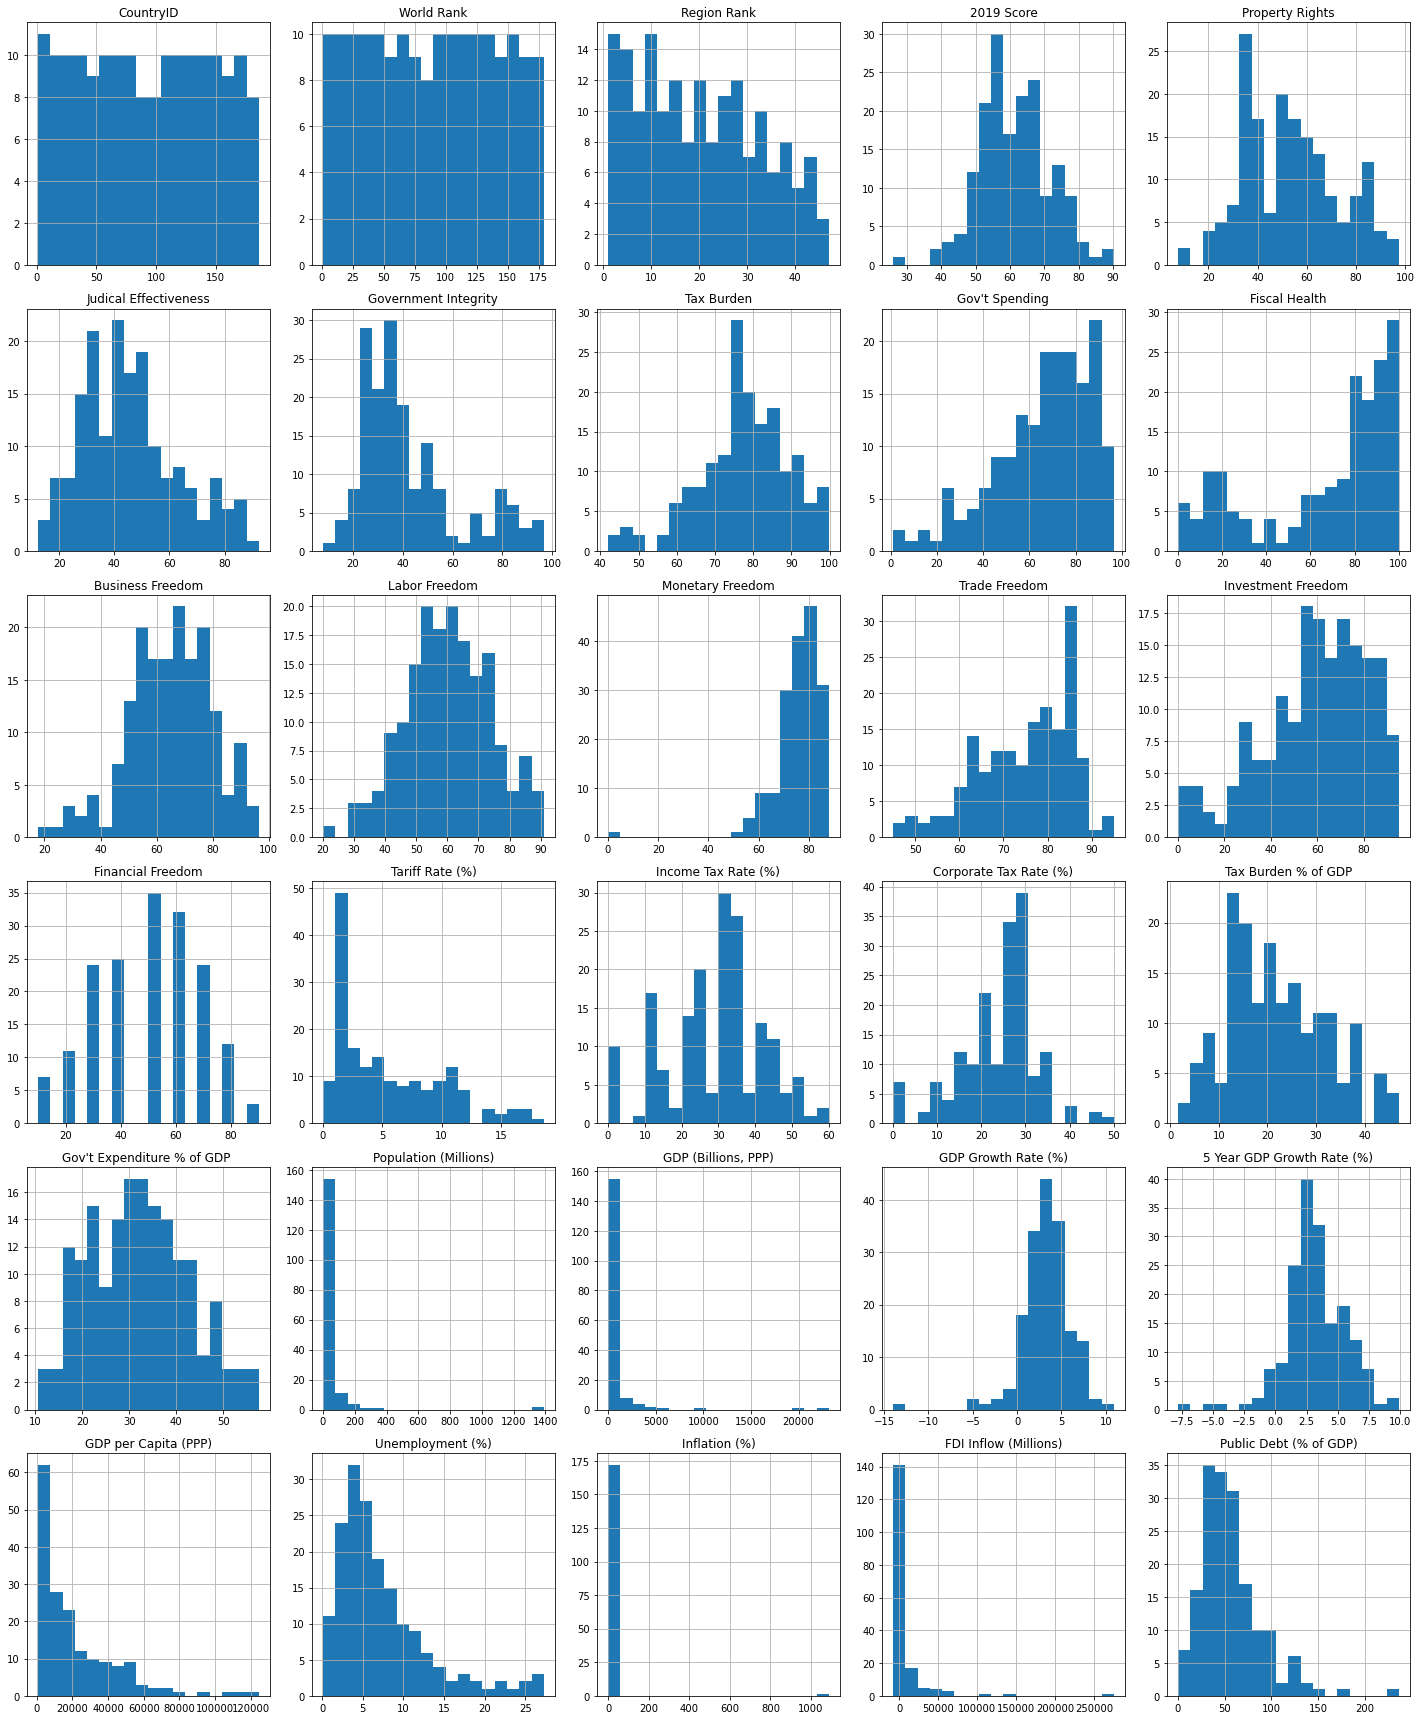

In [222]:
efi_df.hist(figsize=(20,24), bins=18)
plt.tight_layout()

In [421]:
europe_data = pd.DataFrame(efi_df[efi_df.Region=='Europe'])
europe_colors = {'high': 'darkgreen', 'middle': 'darkorange', 'low': 'crimson'}
europe_data.describe()

,CountryID,World Rank,Region Rank,2019 Score,Property Rights,Judical Effectiveness,Government Integrity,Tax Burden,Gov't Spending,Fiscal Health,...,Gov't Expenditure % of GDP,Population (Millions),"GDP (Billions, PPP)",GDP Growth Rate (%),5 Year GDP Growth Rate (%),GDP per Capita (PPP),Unemployment (%),Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP)
count,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,...,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000
mean,89.418605,48.813953,22.418605,68.665116,70.330233,56.662791,56.069767,71.627907,45.997674,84.809302,...,41.758140,19.223256,673.086047,3.453488,2.451163,35348.232558,8.772093,2.604651,8916.839535,60.858140
std,51.576680,33.189396,12.985766,6.927649,13.786027,15.641733,21.241094,14.380631,18.956196,15.153639,...,7.600101,29.979206,1070.834737,1.779426,2.017468,19943.199622,5.643805,2.685584,14240.484180,33.533602
min,2.000000,4.000000,1.000000,52.300000,40.200000,29.600000,25.400000,42.000000,3.900000,23.200000,...,26.400000,0.300000,11.000000,0.000000,-2.300000,5661.000000,0.500000,0.300000,-8296.900000,8.800000
25%,49.500000,20.500000,11.500000,64.250000,59.050000,45.750000,38.150000,60.350000,33.000000,81.600000,...,36.150000,2.950000,49.250000,2.250000,1.250000,23055.500000,4.850000,1.300000,730.800000,37.300000
50%,92.000000,44.000000,22.000000,68.100000,71.500000,51.700000,49.800000,74.900000,46.200000,87.200000,...,42.300000,7.000000,286.800000,3.100000,2.500000,32299.000000,6.700000,1.900000,2491.600000,52.600000
75%,134.000000,68.500000,33.500000,74.550000,82.750000,69.850000,77.700000,84.500000,60.700000,96.450000,...,47.250000,14.250000,519.050000,4.250000,3.200000,45443.000000,11.200000,2.550000,10246.800000,75.500000
max,174.000000,147.000000,44.000000,81.900000,92.300000,85.900000,92.500000,91.800000,79.000000,99.800000,...,56.600000,144.000000,4170.800000,7.800000,9.700000,106374.000000,25.600000,14.400000,57956.700000,181.900000


In [475]:
europe_data.corr()

,CountryID,World Rank,Region Rank,2019 Score,Property Rights,Judical Effectiveness,Government Integrity,Tax Burden,Gov't Spending,Fiscal Health,...,Gov't Expenditure % of GDP,Population (Millions),"GDP (Billions, PPP)",GDP Growth Rate (%),5 Year GDP Growth Rate (%),GDP per Capita (PPP),Unemployment (%),Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP)
CountryID,1.000000,0.067839,0.011286,-0.014338,0.044745,0.095816,0.046636,-0.043988,0.104286,-0.031172,...,-0.062462,0.320763,0.245290,-0.040280,0.073789,0.106163,-0.130716,0.297206,0.202210,-0.074801
World Rank,0.067839,1.000000,0.965239,-0.981107,-0.782223,-0.700559,-0.734505,0.231654,-0.144233,-0.364790,...,0.162793,0.257145,0.066334,-0.160726,-0.427553,-0.578462,0.336037,0.477307,-0.178062,0.351405
Region Rank,0.011286,0.965239,1.000000,-0.986798,-0.782085,-0.730524,-0.771627,0.215128,-0.163294,-0.404276,...,0.177885,0.250287,0.087535,-0.132161,-0.374633,-0.591554,0.382179,0.341099,-0.199227,0.370050
2019 Score,-0.014338,-0.981107,-0.986798,1.000000,0.797703,0.752936,0.783971,-0.235246,0.140178,0.380553,...,-0.158132,-0.237203,-0.055128,0.120968,0.406124,0.617993,-0.355637,-0.408155,0.236608,-0.352302
Property Rights,0.044745,-0.782223,-0.782085,0.797703,1.000000,0.846080,0.899408,-0.638644,-0.329523,0.171754,...,0.312373,-0.093546,0.121115,-0.090225,0.140140,0.771255,-0.507667,-0.438978,0.348655,-0.028574
Judical Effectiveness,0.095816,-0.700559,-0.730524,0.752936,0.846080,1.000000,0.922675,-0.566511,-0.341473,0.138684,...,0.321739,0.006435,0.197256,-0.239508,0.019249,0.704935,-0.332112,-0.315469,0.358195,-0.071620
Government Integrity,0.046636,-0.734505,-0.771627,0.783971,0.899408,0.922675,1.000000,-0.640576,-0.360461,0.206890,...,0.339952,-0.042393,0.147499,-0.180728,0.067593,0.794147,-0.415208,-0.323177,0.371050,-0.078843
Tax Burden,-0.043988,0.231654,0.215128,-0.235246,-0.638644,-0.566511,-0.640576,1.000000,0.729945,0.042703,...,-0.717661,-0.062438,-0.226002,0.309110,0.199092,-0.578536,0.179223,0.301287,-0.337069,-0.433030
Gov't Spending,0.104286,-0.144233,-0.163294,0.140178,-0.329523,-0.341473,-0.360461,0.729945,1.000000,0.174795,...,-0.994314,-0.021465,-0.118104,0.506297,0.490550,-0.279405,0.088145,0.180497,-0.047153,-0.433544
Fiscal Health,-0.031172,-0.364790,-0.404276,0.380553,0.171754,0.138684,0.206890,0.042703,0.174795,1.000000,...,-0.152687,-0.143491,-0.162355,0.019062,0.167294,0.246697,-0.418701,0.084913,-0.053370,-0.517382


{'whiskers': [<matplotlib.lines.Line2D at 0x7ff5dcb96370>,
 'caps': [<matplotlib.lines.Line2D at 0x7ff5dcb96a30>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ff5d7bc9fd0>],
 'medians': [<matplotlib.lines.Line2D at 0x7ff5dcba3130>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ff5dcba3490>],
 'means': []}

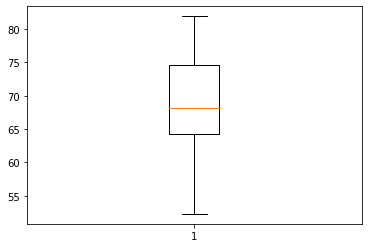

In [564]:
plt.boxplot(europe_data['2019 Score'])

Text(0, 0.5, '2019 Score')

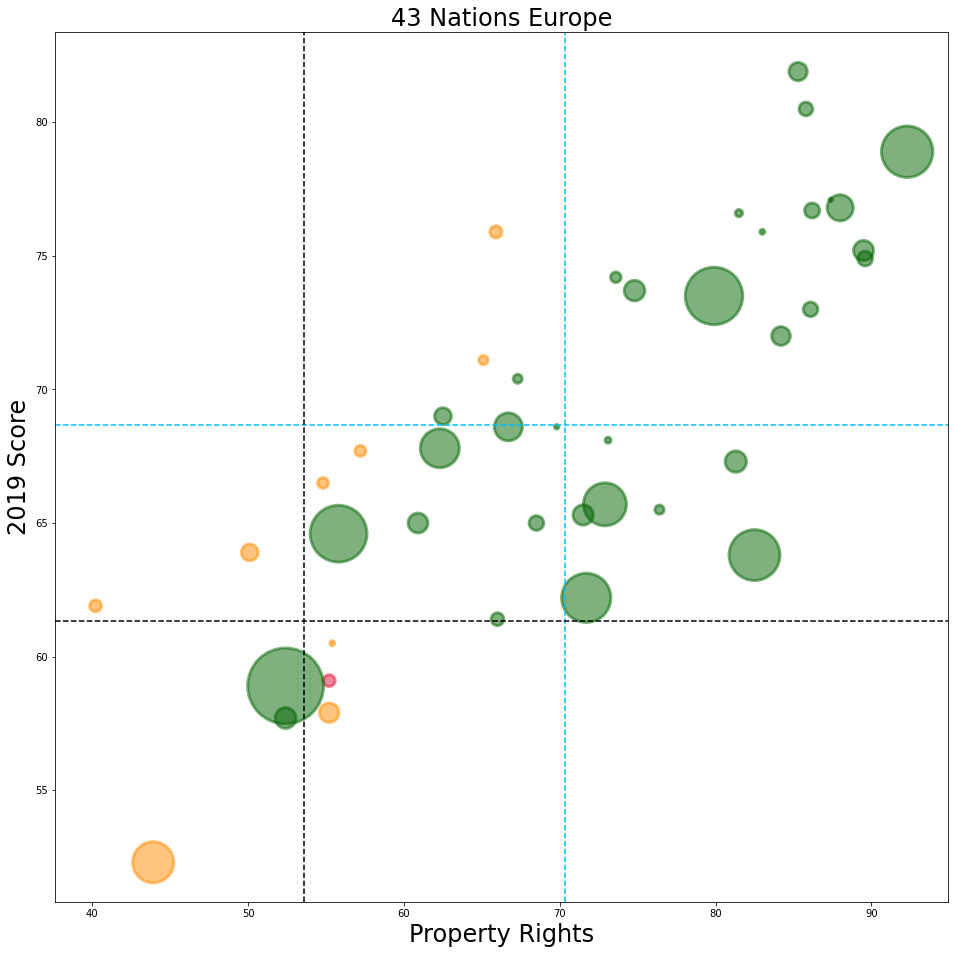

In [541]:
europe_data = efi_df[efi_df.Region=='Europe']
europe_plot = europe_data.plot.scatter(y = '2019 Score', x = 'Property Rights', s = europe_data['Population (Millions)'] * 40, alpha = 0.5,c = europe_data['GDP Category'].map(europe_colors), linewidths=3, figsize = (16,16))
#europe_plot.grid()

plt.axhline(y = europe_data['2019 Score'].mean(), color = 'deepskyblue', linestyle = 'dashed')
plt.axvline(x = europe_data['Property Rights'].mean(), color = 'deepskyblue', linestyle = 'dashed')
plt.axhline(y = efi_df['2019 Score'].mean(), color = 'black', linestyle = 'dashed')
plt.axvline(x = efi_df['Property Rights'].mean(), color = 'black', linestyle = 'dashed')

plt.title('43 Nations Europe', fontsize = 24)
plt.xlabel('Property Rights', fontsize = 24)
plt.ylabel('2019 Score', fontsize = 24)

<ipython-input-604-9627ac153b12>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  europe_data.sort_values('GDP per Capita (PPP)', inplace = True)


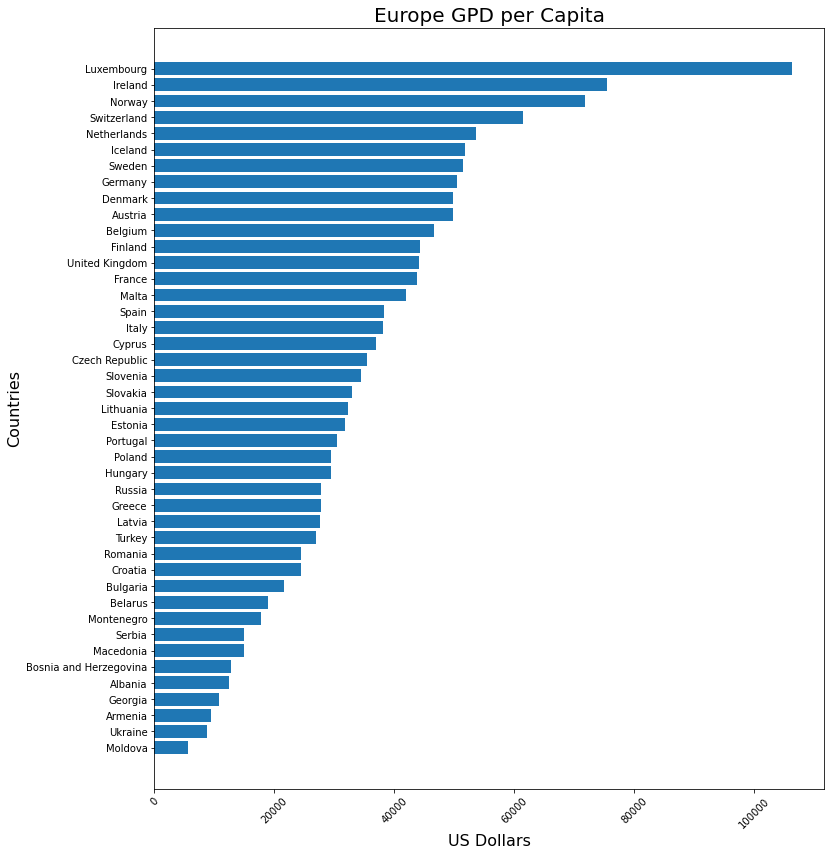

In [604]:
europe_data.sort_values('GDP per Capita (PPP)', inplace = True)

plt.figure(figsize=(12,14))
plt.xticks(rotation=45)

plt.barh(europe_data['Country Name'], europe_data['GDP per Capita (PPP)'])

plt.ylabel("Countries", fontsize = 16)
  
# setting label of x-axis
plt.xlabel("US Dollars", fontsize = 16) 
plt.title("Europe GPD per Capita", fontsize = 20)
plt.show()

In [423]:
america_data = pd.DataFrame(efi_df[efi_df.Region=='Americas'])
america_colors = {'high': 'darkgreen', 'middle': 'darkorange', 'low': 'crimson'}
america_data.describe()

,CountryID,World Rank,Region Rank,2019 Score,Property Rights,Judical Effectiveness,Government Integrity,Tax Burden,Gov't Spending,Fiscal Health,...,Gov't Expenditure % of GDP,Population (Millions),"GDP (Billions, PPP)",GDP Growth Rate (%),5 Year GDP Growth Rate (%),GDP per Capita (PPP),Unemployment (%),Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP)
count,30.000000,30.000000,30.0000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,...,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,82.266667,87.833333,16.1000,60.526667,48.790000,40.433333,37.490000,78.270000,73.000000,65.680000,...,29.03000,32.743333,1031.226667,1.803333,2.076667,17223.333333,7.973333,40.723333,15078.496667,57.870000
std,57.459391,50.366987,9.2972,10.759597,17.795027,17.560758,18.199116,6.793006,13.387101,30.159043,...,7.69976,69.895299,3551.505922,3.418356,2.712892,12420.172880,4.576698,197.792053,50826.280860,27.893865
min,5.000000,8.000000,1.0000,25.900000,7.600000,12.300000,7.900000,67.000000,49.300000,5.900000,...,12.10000,0.100000,1.300000,-14.000000,-7.800000,1815.000000,2.700000,0.100000,-124.600000,23.600000
25%,33.500000,49.250000,8.2500,55.750000,39.700000,29.325000,25.350000,74.800000,62.675000,39.950000,...,22.95000,1.750000,21.450000,1.050000,0.875000,9001.750000,4.500000,1.675000,230.700000,37.825000
50%,68.500000,80.500000,16.5000,62.200000,49.850000,37.750000,33.050000,77.250000,76.600000,79.750000,...,27.95000,7.650000,80.850000,2.350000,2.200000,14467.500000,7.350000,3.050000,892.300000,50.800000
75%,129.750000,120.500000,23.7500,67.275000,59.175000,53.425000,48.975000,80.500000,84.225000,88.875000,...,35.30000,28.150000,413.475000,3.075000,3.575000,20632.750000,9.600000,4.400000,6377.000000,71.900000
max,179.000000,179.000000,32.0000,77.700000,87.000000,78.600000,84.600000,97.300000,95.600000,96.300000,...,41.10000,325.900000,19390.600000,5.400000,6.100000,59501.000000,21.000000,1087.500000,275381.000000,132.900000


In [474]:
america_data.corr()

,CountryID,World Rank,Region Rank,2019 Score,Property Rights,Judical Effectiveness,Government Integrity,Tax Burden,Gov't Spending,Fiscal Health,...,Gov't Expenditure % of GDP,Population (Millions),"GDP (Billions, PPP)",GDP Growth Rate (%),5 Year GDP Growth Rate (%),GDP per Capita (PPP),Unemployment (%),Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP)
CountryID,1.000000,-0.120278,-0.144641,-0.015986,0.033511,-0.006355,0.051115,-0.014609,0.070403,0.002089,...,-0.021258,0.134679,0.253484,-0.304266,-0.188099,0.147305,-0.039297,0.317637,0.230127,-0.122869
World Rank,-0.120278,1.000000,0.984876,-0.946057,-0.758442,-0.673000,-0.733167,-0.128304,-0.327932,-0.636865,...,0.298815,-0.138096,-0.277136,-0.349787,-0.329614,-0.497260,-0.067096,0.353855,-0.274513,-0.217361
Region Rank,-0.144641,0.984876,1.000000,-0.924643,-0.777546,-0.690285,-0.767558,-0.071039,-0.273064,-0.572572,...,0.242876,-0.154334,-0.284385,-0.319111,-0.277573,-0.506274,-0.121819,0.333460,-0.281637,-0.249964
2019 Score,-0.015986,-0.946057,-0.924643,1.000000,0.805114,0.690748,0.740797,0.111971,0.317060,0.619083,...,-0.292737,0.167368,0.288627,0.561236,0.470170,0.491350,0.056525,-0.616681,0.294467,0.244620
Property Rights,0.033511,-0.758442,-0.777546,0.805114,1.000000,0.713691,0.792880,-0.113756,-0.065545,0.155711,...,0.084892,0.360434,0.387611,0.363582,0.207087,0.687934,-0.010394,-0.442086,0.400623,0.389514
Judical Effectiveness,-0.006355,-0.673000,-0.690285,0.690748,0.713691,1.000000,0.875891,-0.241989,-0.192594,0.100346,...,0.213282,0.360887,0.439774,0.119866,-0.086131,0.608218,0.442858,-0.299489,0.448855,0.631074
Government Integrity,0.051115,-0.733167,-0.767558,0.740797,0.792880,0.875891,1.000000,-0.150542,-0.169456,0.140706,...,0.183434,0.251294,0.417727,0.209249,0.034770,0.729280,0.202856,-0.311204,0.415553,0.515237
Tax Burden,-0.014609,-0.128304,-0.071039,0.111971,-0.113756,-0.241989,-0.150542,1.000000,0.399485,0.257542,...,-0.406600,-0.242958,-0.147975,0.216397,0.299943,0.026911,-0.253799,-0.108544,-0.153082,-0.364874
Gov't Spending,0.070403,-0.327932,-0.273064,0.317060,-0.065545,-0.192594,-0.169456,0.399485,1.000000,0.635798,...,-0.989714,-0.346248,-0.292836,0.267132,0.364883,-0.328670,0.023469,-0.213542,-0.291914,-0.418884
Fiscal Health,0.002089,-0.636865,-0.572572,0.619083,0.155711,0.100346,0.140706,0.257542,0.635798,1.000000,...,-0.614349,-0.231495,-0.122134,0.464707,0.566772,-0.113413,0.006966,-0.308342,-0.132774,-0.195797


Text(0, 0.5, '2019 Score')

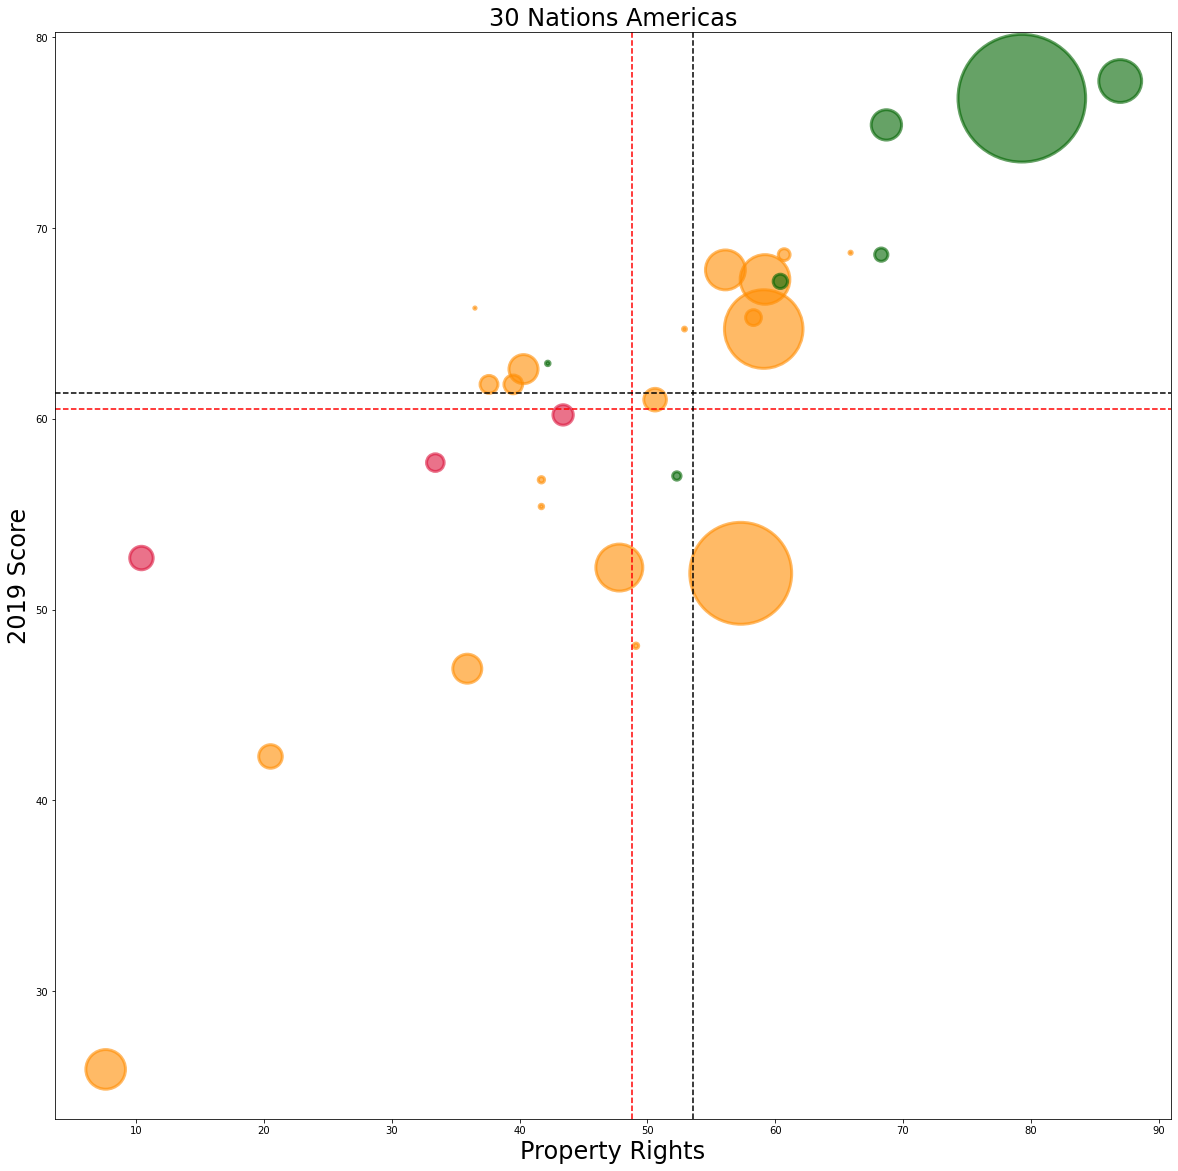

In [542]:
america_plot = america_data.plot.scatter(y = '2019 Score', x = 'Property Rights', s = america_data['Population (Millions)'] * 50, alpha = 0.6,  linewidths=3, c = america_data['GDP Category'].map(america_colors), figsize = (20,20))
#america_plot.grid()

plt.axhline(y = america_data['2019 Score'].mean(), color = 'red', linestyle = 'dashed')
plt.axvline(x = america_data['Property Rights'].mean(), color = 'red', linestyle = 'dashed')
plt.axhline(y = efi_df['2019 Score'].mean(), color = 'black', linestyle = 'dashed')
plt.axvline(x = efi_df['Property Rights'].mean(), color = 'black', linestyle = 'dashed')

plt.title('30 Nations Americas', fontsize = 24)
plt.xlabel('Property Rights', fontsize = 24)
plt.ylabel('2019 Score', fontsize = 24)

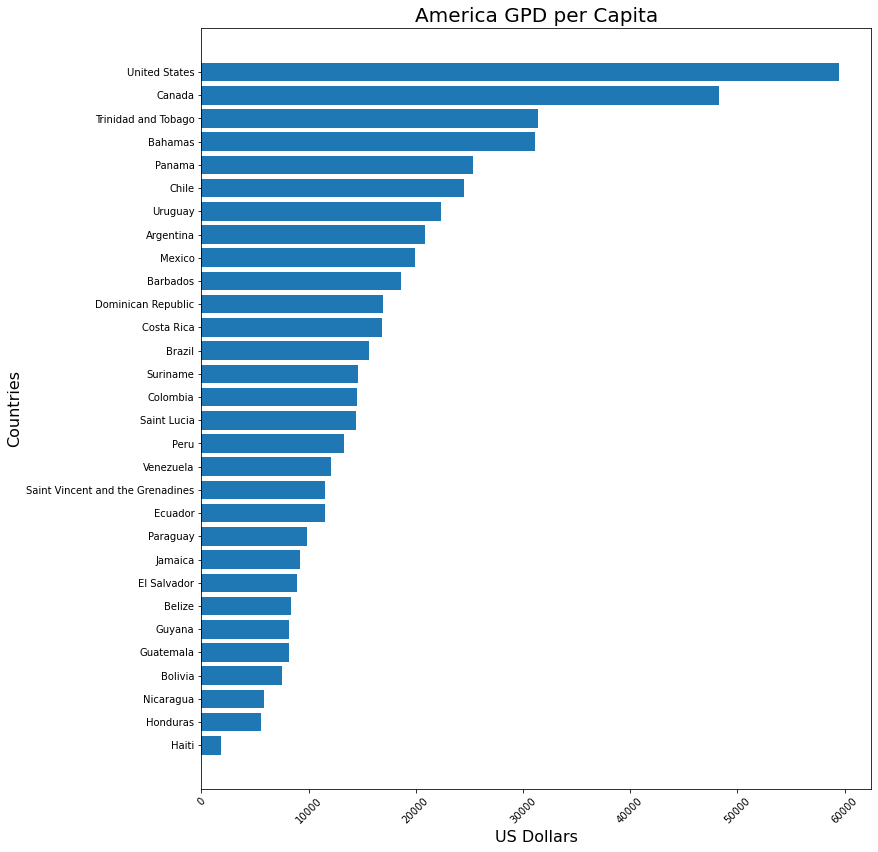

In [605]:
america_data.sort_values('GDP per Capita (PPP)', inplace = True)

plt.figure(figsize=(12,14))
plt.xticks(rotation=45)

plt.barh(america_data['Country Name'], america_data['GDP per Capita (PPP)'])

plt.ylabel("Countries", fontsize = 16)
  
# setting label of x-axis
plt.xlabel("US Dollars", fontsize = 16) 
plt.title("America GPD per Capita", fontsize = 20)
plt.show()

In [419]:
asia_data = pd.DataFrame(efi_df[efi_df.Region=='Asia-Pacific'])
asia_colors = {'high': 'darkgreen', 'middle': 'darkorange', 'low': 'crimson'}
asia_data.describe()

,CountryID,World Rank,Region Rank,2019 Score,Property Rights,Judical Effectiveness,Government Integrity,Tax Burden,Gov't Spending,Fiscal Health,...,Gov't Expenditure % of GDP,Population (Millions),"GDP (Billions, PPP)",GDP Growth Rate (%),5 Year GDP Growth Rate (%),GDP per Capita (PPP),Unemployment (%),Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP)
count,40.000000,40.000000,40.000000,40.000000,40.000000,40.00000,40.000000,40.000000,40.000000,40.000000,...,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000
mean,104.600000,87.300000,20.600000,62.555000,56.015000,47.92750,42.627500,83.130000,72.250000,70.930000,...,28.795000,103.332500,1361.332500,4.502500,4.282500,21540.700000,4.090000,3.707500,12898.712500,47.772500
std,56.288998,49.726019,11.859866,10.765804,19.039238,19.17977,20.066543,9.507573,19.268747,29.691751,...,9.932308,296.417919,3938.515493,2.225319,2.286066,26256.287602,2.338178,3.071072,28590.211719,40.278371
min,1.000000,1.000000,1.000000,44.200000,19.600000,13.10000,16.700000,62.800000,0.900000,6.200000,...,13.600000,0.100000,0.600000,-0.500000,-1.400000,1958.000000,0.200000,-0.400000,-200.500000,0.000000
25%,73.250000,52.750000,10.750000,55.275000,43.300000,34.45000,30.400000,77.050000,60.625000,54.075000,...,20.175000,2.625000,29.825000,3.075000,2.800000,5422.500000,2.400000,1.450000,95.300000,28.400000
50%,109.000000,100.500000,20.500000,58.400000,51.050000,44.40000,36.400000,84.450000,75.700000,81.200000,...,28.450000,12.900000,180.200000,4.350000,4.250000,9260.500000,3.750000,3.300000,2232.550000,41.750000
75%,154.750000,128.250000,30.250000,66.425000,64.475000,58.12500,49.450000,90.850000,87.775000,93.450000,...,36.200000,51.775000,889.400000,6.700000,6.300000,26949.250000,5.050000,5.025000,9529.075000,58.425000
max,186.000000,172.000000,42.000000,90.200000,97.400000,92.40000,96.700000,97.300000,94.500000,100.000000,...,57.500000,1390.100000,23159.100000,9.300000,7.900000,111629.000000,10.300000,13.000000,136320.000000,236.400000


In [473]:
asia_data.corr()

,CountryID,World Rank,Region Rank,2019 Score,Property Rights,Judical Effectiveness,Government Integrity,Tax Burden,Gov't Spending,Fiscal Health,...,Gov't Expenditure % of GDP,Population (Millions),"GDP (Billions, PPP)",GDP Growth Rate (%),5 Year GDP Growth Rate (%),GDP per Capita (PPP),Unemployment (%),Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP)
CountryID,1.000000,0.136621,0.148512,-0.115864,0.054791,-0.135281,-0.041814,0.212555,-0.213848,-0.242620,...,0.180623,-0.236212,-0.247999,-0.119435,-0.122960,0.063082,0.016158,-0.075036,-0.260141,-0.077756
World Rank,0.136621,1.000000,0.986947,-0.963545,-0.868871,-0.788795,-0.762741,0.368466,-0.195517,-0.371915,...,0.169488,0.120169,-0.017790,0.224690,0.491544,-0.694394,0.102266,0.349545,-0.318108,-0.151265
Region Rank,0.148512,0.986947,1.000000,-0.930408,-0.833705,-0.759308,-0.712523,0.362922,-0.212130,-0.352418,...,0.184896,0.085576,-0.057480,0.203189,0.458225,-0.644155,0.118115,0.328143,-0.330157,-0.160629
2019 Score,-0.115864,-0.963545,-0.930408,1.000000,0.896105,0.822213,0.843660,-0.304936,0.210771,0.370609,...,-0.192041,-0.127384,-0.011842,-0.207832,-0.439168,0.726091,-0.105303,-0.353042,0.412648,0.130742
Property Rights,0.054791,-0.868871,-0.833705,0.896105,1.000000,0.801820,0.871523,-0.287373,-0.021601,0.160165,...,0.060452,-0.054204,0.045411,-0.260022,-0.453774,0.643374,-0.045418,-0.313141,0.347325,0.270736
Judical Effectiveness,-0.135281,-0.788795,-0.759308,0.822213,0.801820,1.000000,0.843071,-0.450881,0.176895,0.198989,...,-0.141157,0.242447,0.337533,-0.110751,-0.302064,0.654453,-0.043179,-0.321104,0.564052,0.188722
Government Integrity,-0.041814,-0.762741,-0.712523,0.843660,0.871523,0.843071,1.000000,-0.297387,-0.071614,0.104760,...,0.084812,0.049119,0.153450,-0.331590,-0.370166,0.584955,-0.069781,-0.366983,0.472950,0.303004
Tax Burden,0.212555,0.368466,0.362922,-0.304936,-0.287373,-0.450881,-0.297387,1.000000,-0.034933,-0.328634,...,0.012935,-0.253710,-0.330161,0.024404,0.132979,-0.130075,0.206223,0.329040,-0.175752,-0.161414
Gov't Spending,-0.213848,-0.195517,-0.212130,0.210771,-0.021601,0.176895,-0.071614,-0.034933,1.000000,0.292853,...,-0.981646,0.081875,0.023368,0.542996,0.298821,0.170427,-0.220756,0.110533,0.150594,-0.020566
Fiscal Health,-0.242620,-0.371915,-0.352418,0.370609,0.160165,0.198989,0.104760,-0.328634,0.292853,1.000000,...,-0.297602,-0.177744,-0.066693,0.118969,-0.032551,0.119097,-0.175172,0.077017,0.108920,-0.260593


Text(0, 0.5, '2019 Score')

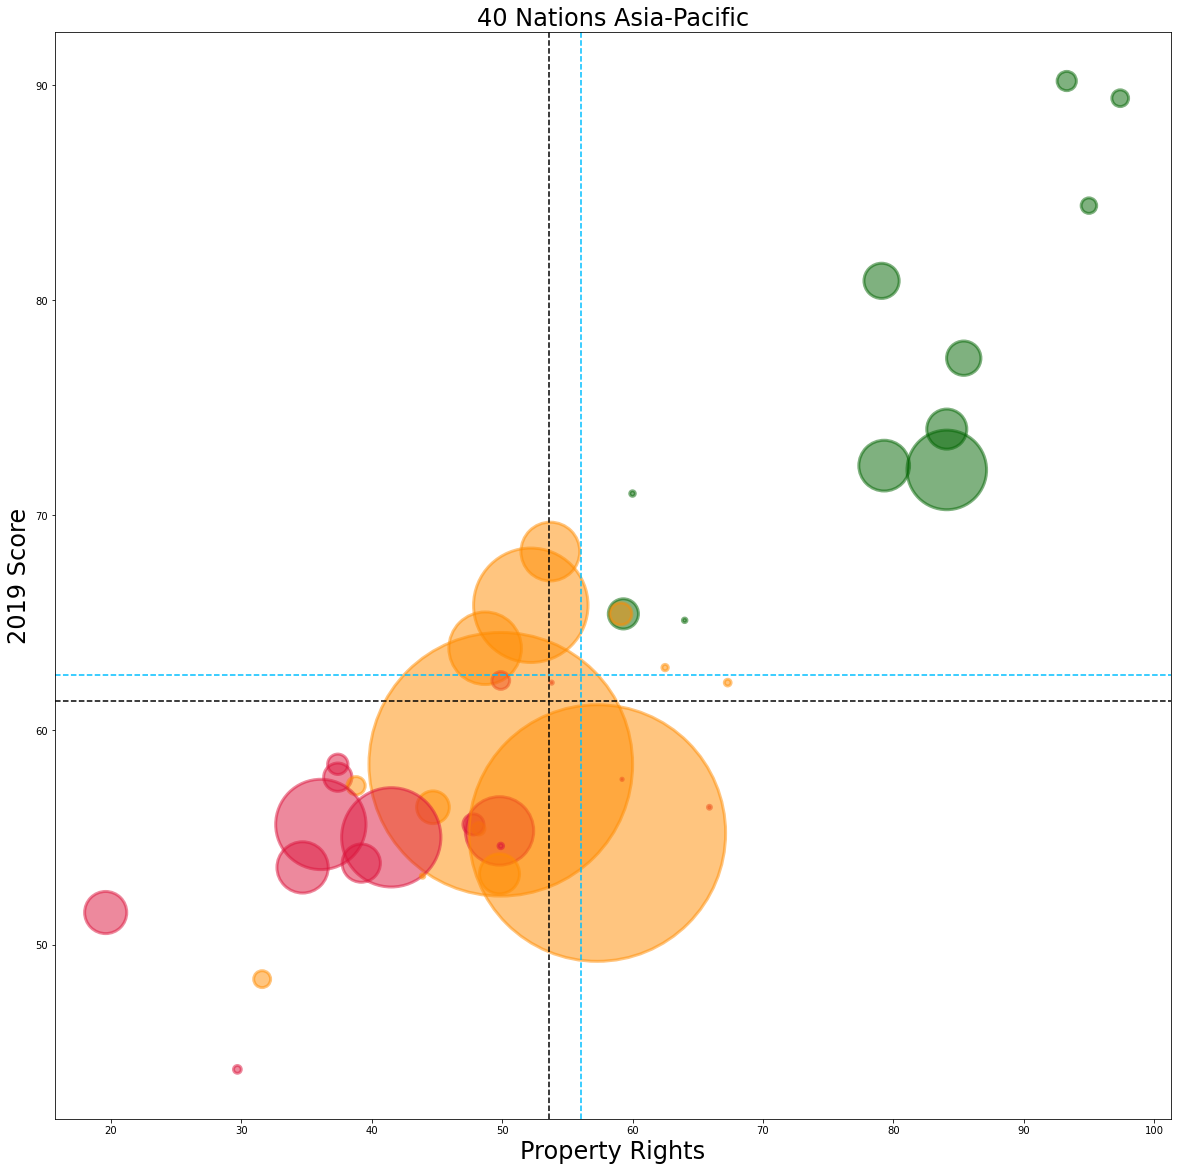

In [543]:
asia_data = efi_df[efi_df.Region=='Asia-Pacific']
asia_plot = asia_data.plot.scatter(y = '2019 Score', x = 'Property Rights', s = asia_data['Population (Millions)'] * 50, linewidths=3,alpha = .5, c = asia_data['GDP Category'].map(asia_colors), figsize = (20,20))
#asia_plot.grid()

plt.axhline(y = asia_data['2019 Score'].mean(), color = 'deepskyblue', linestyle = 'dashed')
plt.axvline(x = asia_data['Property Rights'].mean(), color = 'deepskyblue', linestyle = 'dashed')
plt.axhline(y = efi_df['2019 Score'].mean(), color = 'black', linestyle = 'dashed')
plt.axvline(x = efi_df['Property Rights'].mean(), color = 'black', linestyle = 'dashed')

plt.title('40 Nations Asia-Pacific', fontsize = 24)
plt.xlabel('Property Rights', fontsize = 24)
plt.ylabel('2019 Score', fontsize = 24)

<ipython-input-607-33fdbd4048cf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  asia_data.sort_values('GDP per Capita (PPP)', inplace = True)


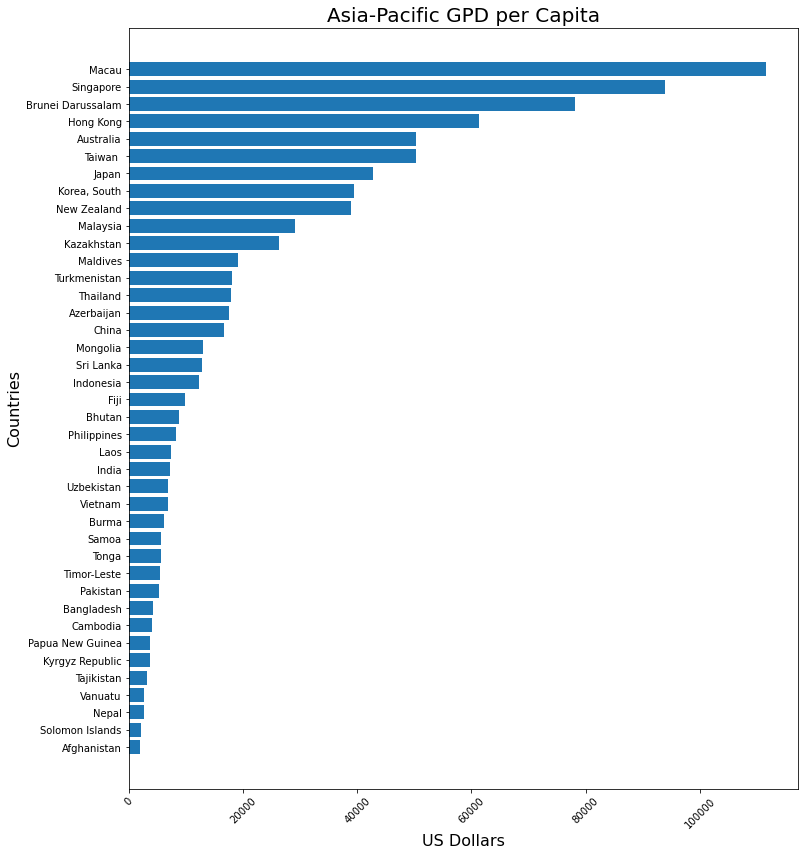

In [607]:
asia_data.sort_values('GDP per Capita (PPP)', inplace = True)

plt.figure(figsize=(12,14))
plt.xticks(rotation=45)

plt.barh(asia_data['Country Name'], asia_data['GDP per Capita (PPP)'])

plt.ylabel("Countries", fontsize = 16)
  
# setting label of x-axis
plt.xlabel("US Dollars", fontsize = 16) 
plt.title("Asia-Pacific GPD per Capita", fontsize = 20)
plt.show()

In [556]:
mena_data = pd.DataFrame(efi_df[efi_df.Region=='Middle East and North Africa'])
mena_colors = {'high': 'darkgreen', 'middle': 'darkorange', 'low': 'crimson'}
mena_data.describe()

,CountryID,World Rank,Region Rank,2019 Score,Property Rights,Judical Effectiveness,Government Integrity,Tax Burden,Gov't Spending,Fiscal Health,...,Gov't Expenditure % of GDP,Population (Millions),"GDP (Billions, PPP)",GDP Growth Rate (%),5 Year GDP Growth Rate (%),GDP per Capita (PPP),Unemployment (%),Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP)
count,14.000000,14.000000,14.0000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,...,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000
mean,95.785714,90.285714,7.5000,61.257143,54.442857,51.685714,46.714286,87.721429,60.764286,48.578571,...,35.214286,24.257143,553.971429,1.835714,2.742857,38826.785714,7.071429,4.221429,3988.528571,61.500000
std,51.724386,52.835636,4.1833,9.324304,15.540306,15.388450,18.404383,12.594637,18.817447,38.621839,...,8.548041,30.117225,577.361780,2.029629,1.098751,32377.462639,5.263726,6.225157,5183.857286,38.853492
min,3.000000,9.000000,1.0000,46.200000,31.600000,26.600000,18.200000,61.900000,17.300000,0.000000,...,18.500000,1.500000,70.400000,-2.500000,-0.100000,8567.000000,0.100000,-0.900000,300.500000,17.300000
25%,76.750000,53.250000,4.2500,53.225000,41.925000,42.850000,35.075000,77.525000,53.500000,16.750000,...,29.900000,4.425000,148.200000,0.675000,2.350000,13312.500000,2.400000,0.950000,1040.250000,29.575000
50%,91.000000,89.000000,7.5000,60.900000,56.100000,49.500000,44.500000,91.600000,65.400000,49.250000,...,33.950000,9.400000,307.550000,2.050000,3.200000,28270.000000,6.050000,1.800000,1766.100000,57.500000
75%,131.750000,139.250000,10.7500,66.475000,62.225000,58.150000,53.750000,98.850000,73.225000,88.000000,...,39.325000,34.275000,673.325000,3.275000,3.475000,53209.000000,11.575000,5.100000,4427.100000,85.550000
max,173.000000,171.000000,14.0000,77.600000,81.800000,87.100000,78.800000,99.800000,89.800000,99.100000,...,52.500000,94.800000,1773.600000,4.300000,3.800000,124529.000000,15.400000,23.500000,18954.000000,152.800000


In [472]:
mena_data.corr()

,CountryID,World Rank,Region Rank,2019 Score,Property Rights,Judical Effectiveness,Government Integrity,Tax Burden,Gov't Spending,Fiscal Health,...,Gov't Expenditure % of GDP,Population (Millions),"GDP (Billions, PPP)",GDP Growth Rate (%),5 Year GDP Growth Rate (%),GDP per Capita (PPP),Unemployment (%),Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP)
CountryID,1.000000,-0.373404,-0.357813,0.415366,0.424968,0.430372,0.402665,0.180552,0.077751,0.352216,...,-0.073759,-0.306490,0.020792,-0.373541,-0.264032,0.324952,-0.098826,-0.335755,0.037208,-0.243220
World Rank,-0.373404,1.000000,0.990132,-0.993958,-0.961534,-0.823353,-0.905299,-0.241606,0.169581,-0.502494,...,-0.227488,0.580844,0.316651,0.116390,-0.186793,-0.590771,0.569530,0.569413,-0.339953,0.215820
Region Rank,-0.357813,0.990132,1.000000,-0.986230,-0.959738,-0.804786,-0.880622,-0.179361,0.136757,-0.482082,...,-0.198121,0.574163,0.386530,0.055718,-0.210867,-0.519309,0.515970,0.511162,-0.391680,0.128729
2019 Score,0.415366,-0.993958,-0.986230,1.000000,0.965841,0.852061,0.918900,0.239313,-0.128665,0.529201,...,0.183532,-0.552673,-0.279297,-0.108846,0.197886,0.607405,-0.575956,-0.533625,0.394453,-0.212718
Property Rights,0.424968,-0.961534,-0.959738,0.965841,1.000000,0.855780,0.878341,0.132591,-0.190744,0.439825,...,0.252151,-0.615323,-0.330392,-0.160283,0.153596,0.503910,-0.579146,-0.592672,0.475465,-0.223723
Judical Effectiveness,0.430372,-0.823353,-0.804786,0.852061,0.855780,1.000000,0.889380,0.130469,-0.073957,0.433414,...,0.132198,-0.214377,0.133144,-0.091700,0.354990,0.480231,-0.439413,-0.301745,0.596580,-0.446003
Government Integrity,0.402665,-0.905299,-0.880622,0.918900,0.878341,0.889380,1.000000,0.245609,-0.133477,0.493692,...,0.188241,-0.437739,-0.102998,-0.081604,0.358833,0.698339,-0.574523,-0.484523,0.382433,-0.391456
Tax Burden,0.180552,-0.241606,-0.179361,0.239313,0.132591,0.130469,0.245609,1.000000,-0.264194,-0.121597,...,0.261991,-0.303459,0.038928,-0.578134,-0.237872,0.600303,-0.524536,-0.179678,-0.490224,-0.089421
Gov't Spending,0.077751,0.169581,0.136757,-0.128665,-0.190744,-0.073957,-0.133477,-0.264194,1.000000,-0.077918,...,-0.987419,0.390338,0.245632,0.701202,0.463761,-0.414853,0.555560,0.322162,0.110705,0.447774
Fiscal Health,0.352216,-0.502494,-0.482082,0.529201,0.439825,0.433414,0.493692,-0.121597,-0.077918,1.000000,...,0.015980,-0.145824,-0.002008,-0.063618,-0.086098,0.419295,-0.187321,-0.329946,0.303519,-0.484090


Text(0, 0.5, '2019 Score')

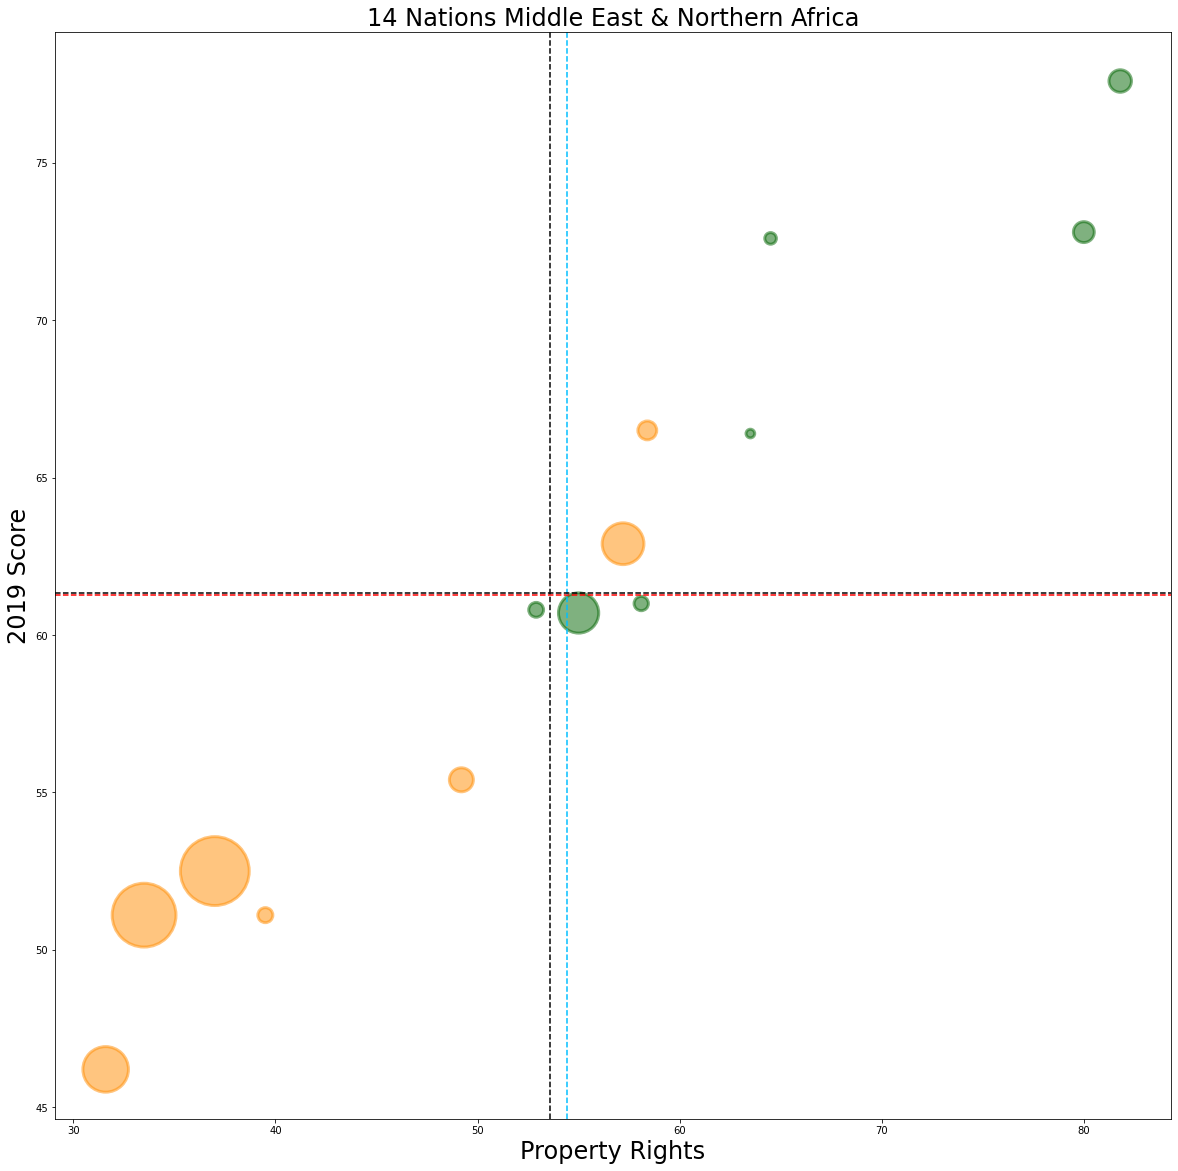

In [557]:
mena_data = efi_df[efi_df.Region=='Middle East and North Africa']
mine_plot = mena_data.plot.scatter(y = '2019 Score', x = 'Property Rights', s = mena_data['Population (Millions)'] * 50, alpha = 0.5, c = mena_data['GDP Category'].map(mena_colors), linewidths=3,figsize = (20,20))
#mine_plot.grid()

plt.axhline(y = mena_data['2019 Score'].mean(), color = 'red', linestyle = 'dashed')
plt.axvline(x = mena_data['Property Rights'].mean(), color = 'deepskyblue', linestyle = 'dashed')
plt.axhline(y = efi_df['2019 Score'].mean(), color = 'black', linestyle = 'dashed')
plt.axvline(x = efi_df['Property Rights'].mean(), color = 'black', linestyle = 'dashed')

plt.title('14 Nations Middle East & Northern Africa', fontsize = 24)
plt.xlabel('Property Rights', fontsize = 24)
plt.ylabel('2019 Score', fontsize = 24)

<ipython-input-608-21cac6ccab25>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mena_data.sort_values('GDP per Capita (PPP)', inplace = True)


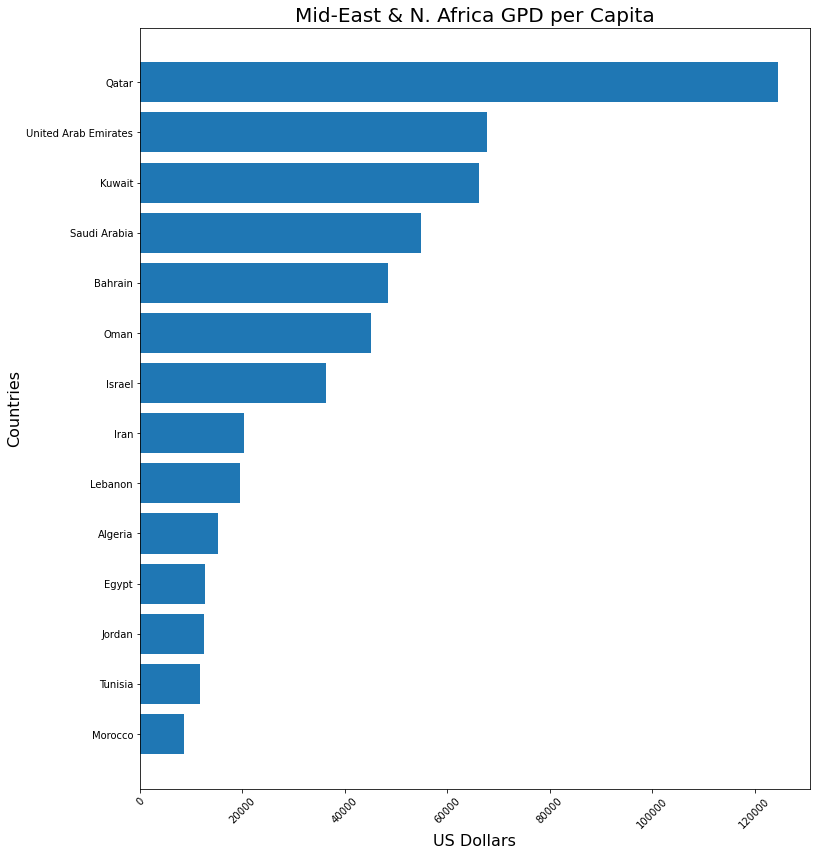

In [608]:
mena_data.sort_values('GDP per Capita (PPP)', inplace = True)

plt.figure(figsize=(12,14))
plt.xticks(rotation=45)

plt.barh(mena_data['Country Name'], mena_data['GDP per Capita (PPP)'])

plt.ylabel("Countries", fontsize = 16)
  
# setting label of x-axis
plt.xlabel("US Dollars", fontsize = 16) 
plt.title("Mid-East & N. Africa GPD per Capita", fontsize = 20)
plt.show()

In [549]:
ssa_data = pd.DataFrame(efi_df[efi_df.Region=='Sub-Saharan Africa'])
ssa_colors = {'high': 'darkgreen', 'middle': 'darkorange', 'low': 'crimson'}
ssa_data.describe()

,CountryID,World Rank,Region Rank,2019 Score,Property Rights,Judical Effectiveness,Government Integrity,Tax Burden,Gov't Spending,Fiscal Health,...,Gov't Expenditure % of GDP,Population (Millions),"GDP (Billions, PPP)",GDP Growth Rate (%),5 Year GDP Growth Rate (%),GDP per Capita (PPP),Unemployment (%),Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP)
count,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,...,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000
mean,88.173913,128.586957,24.391304,54.026087,38.597826,36.426087,30.878261,75.247826,76.363043,52.693478,...,26.710870,21.741304,87.047826,3.497826,3.723913,5196.608696,8.467391,7.378261,630.236957,58.228261
std,52.264415,37.813329,13.594898,7.217708,11.383545,11.840241,9.997842,9.222502,15.355308,31.637962,...,8.709796,32.808004,195.828984,3.067282,2.661427,6727.874584,7.371177,8.988113,980.193851,29.829595
min,4.000000,25.000000,1.000000,38.900000,19.600000,18.100000,14.300000,46.100000,27.300000,0.000000,...,10.600000,0.200000,0.700000,-4.600000,-5.600000,677.000000,0.400000,-0.900000,-2254.500000,15.600000
25%,38.500000,109.500000,13.250000,50.000000,32.600000,29.600000,25.300000,69.750000,70.400000,19.875000,...,21.025000,2.225000,11.350000,2.500000,2.725000,1672.500000,3.825000,1.150000,150.450000,38.225000
50%,89.500000,134.500000,24.500000,54.000000,35.850000,34.400000,28.100000,76.000000,79.700000,62.050000,...,26.000000,12.000000,28.750000,3.750000,3.800000,2540.500000,6.050000,5.300000,350.600000,53.050000
75%,133.500000,158.750000,35.750000,57.450000,42.425000,42.800000,35.500000,81.175000,86.675000,81.925000,...,31.450000,25.450000,68.800000,5.275000,5.375000,4693.250000,10.200000,8.975000,693.450000,64.525000
max,183.000000,177.000000,47.000000,73.000000,72.200000,83.200000,67.900000,92.100000,96.600000,96.900000,...,49.200000,188.700000,1118.800000,10.900000,9.900000,36017.000000,27.300000,41.500000,3586.400000,131.200000


Text(0, 0.5, '2019 Score')

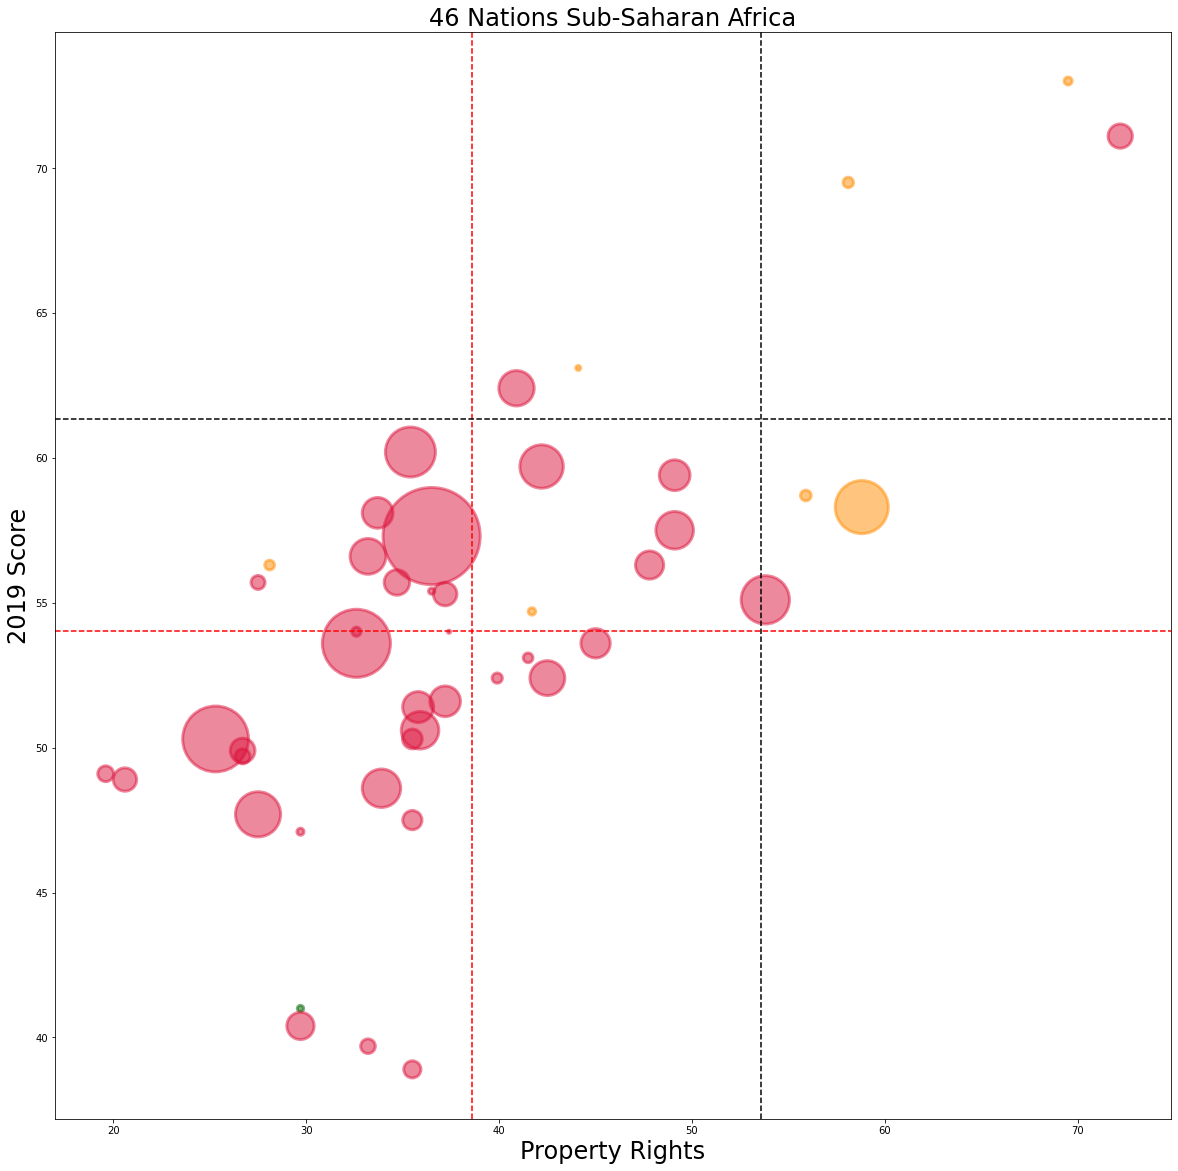

In [561]:
ssa_data = efi_df[efi_df.Region=='Sub-Saharan Africa']
ssa_plot = ssa_data.plot.scatter(y = '2019 Score', x = 'Property Rights', s = ssa_data['Population (Millions)'] * 50, alpha = 0.5, c = ssa_data['GDP Category'].map(ssa_colors), linewidths=3,figsize = (20,20))
#ssa_plot.grid()

plt.axhline(y = ssa_data['2019 Score'].mean(), color = 'red', linestyle = 'dashed')
plt.axvline(x = ssa_data['Property Rights'].mean(), color = 'red', linestyle = 'dashed')
plt.axhline(y = efi_df['2019 Score'].mean(), color = 'black', linestyle = 'dashed')
plt.axvline(x = efi_df['Property Rights'].mean(), color = 'black', linestyle = 'dashed')

plt.title('46 Nations Sub-Saharan Africa', fontsize = 24)
plt.xlabel('Property Rights', fontsize = 24)
plt.ylabel('2019 Score', fontsize = 24)

<ipython-input-609-e9bdd2d3894d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ssa_data.sort_values('GDP per Capita (PPP)', inplace = True)


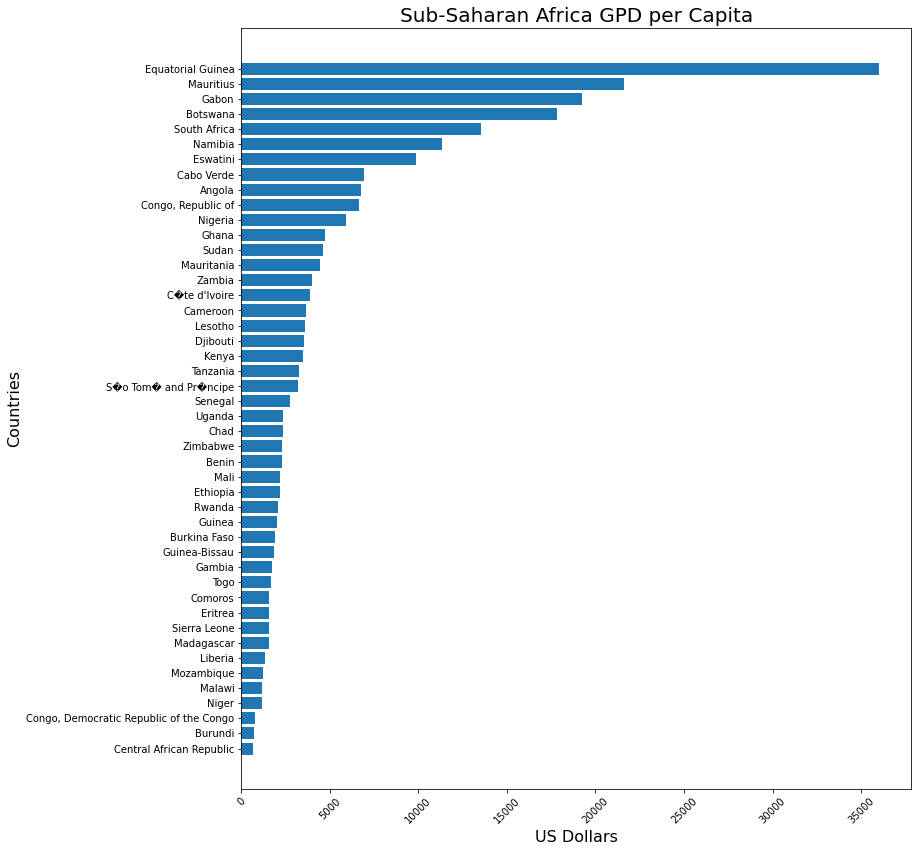

In [609]:
ssa_data.sort_values('GDP per Capita (PPP)', inplace = True)

plt.figure(figsize=(12,14))
plt.xticks(rotation=45)

plt.barh(ssa_data['Country Name'], ssa_data['GDP per Capita (PPP)'])

plt.ylabel("Countries", fontsize = 16)
  
# setting label of x-axis
plt.xlabel("US Dollars", fontsize = 16) 
plt.title("Sub-Saharan Africa GPD per Capita", fontsize = 20)
plt.show()

In [470]:
ssa_data.corr()

,CountryID,World Rank,Region Rank,2019 Score,Property Rights,Judical Effectiveness,Government Integrity,Tax Burden,Gov't Spending,Fiscal Health,...,Gov't Expenditure % of GDP,Population (Millions),"GDP (Billions, PPP)",GDP Growth Rate (%),5 Year GDP Growth Rate (%),GDP per Capita (PPP),Unemployment (%),Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP)
CountryID,1.000000,-0.057489,-0.083635,0.063303,0.202560,0.145731,0.092293,0.090884,0.017857,-0.134161,...,-0.000361,0.124882,0.185266,0.084741,0.131835,-0.075827,0.144619,-0.005834,0.156264,0.050595
World Rank,-0.057489,1.000000,0.947753,-0.964382,-0.755584,-0.755300,-0.718856,-0.270725,-0.132686,-0.466408,...,0.084849,-0.037511,-0.126618,-0.276789,-0.321450,-0.255146,-0.053411,0.265440,-0.082822,0.277655
Region Rank,-0.083635,0.947753,1.000000,-0.941704,-0.669340,-0.678728,-0.636816,-0.221756,-0.192469,-0.484418,...,0.146142,-0.126713,-0.204453,-0.323672,-0.367791,-0.164849,-0.065465,0.269755,-0.135851,0.324409
2019 Score,0.063303,-0.964382,-0.941704,1.000000,0.711883,0.767431,0.719638,0.293787,0.184046,0.509934,...,-0.142367,0.067570,0.124389,0.334981,0.379989,0.151614,0.052039,-0.189717,0.073542,-0.350875
Property Rights,0.202560,-0.755584,-0.669340,0.711883,1.000000,0.778844,0.743976,0.171408,-0.163120,-0.018613,...,0.233567,-0.040816,0.139126,0.173697,0.287017,0.267803,0.220629,-0.228526,0.031043,-0.116966
Judical Effectiveness,0.145731,-0.755300,-0.678728,0.767431,0.778844,1.000000,0.811808,0.174874,-0.045422,0.158350,...,0.098655,-0.017703,0.003461,0.261762,0.339470,0.048223,0.118863,-0.139833,0.093497,-0.170439
Government Integrity,0.092293,-0.718856,-0.636816,0.719638,0.743976,0.811808,1.000000,0.086760,-0.184934,0.116862,...,0.238299,-0.151762,-0.062472,0.234111,0.368883,0.135246,0.257249,-0.203429,0.064081,-0.029823
Tax Burden,0.090884,-0.270725,-0.221756,0.293787,0.171408,0.174874,0.086760,1.000000,0.251494,0.087299,...,-0.224705,0.156146,0.070870,0.363896,0.279502,0.043290,-0.194071,0.328238,0.037802,0.012934
Gov't Spending,0.017857,-0.132686,-0.192469,0.184046,-0.163120,-0.045422,-0.184934,0.251494,1.000000,0.454008,...,-0.977662,0.414388,0.219831,0.247713,0.103251,-0.172979,-0.467602,0.282166,0.220014,-0.090093
Fiscal Health,-0.134161,-0.466408,-0.484418,0.509934,-0.018613,0.158350,0.116862,0.087299,0.454008,1.000000,...,-0.501675,0.210316,0.128307,0.214144,0.119191,-0.026361,-0.112641,0.060617,0.051866,-0.423828


In [506]:
ssa_mean = ssa_data['2019 Score'].mean()
europe_mean = europe_data['2019 Score'].mean()
america_mean = america_data['2019 Score'].mean()
asia_mean = asia_data['2019 Score'].mean()
mena_mean = mena_data['2019 Score'].mean()

mean_2019_score = np.sort([ssa_mean, europe_mean, america_mean, asia_mean, mena_mean])

region_lst = ['Sub-Saharan Africa', 'Americas', 'Middle East and Northern Africa','Asia-Pacific','Europe']

[ssa_mean, europe_mean, america_mean, asia_mean, mena_mean]

[54.02608695652172,
 68.66511627906978,
 60.52666666666668,
 62.55500000000001,
 61.25714285714286]

Text(0, 0.5, '2019 Score')

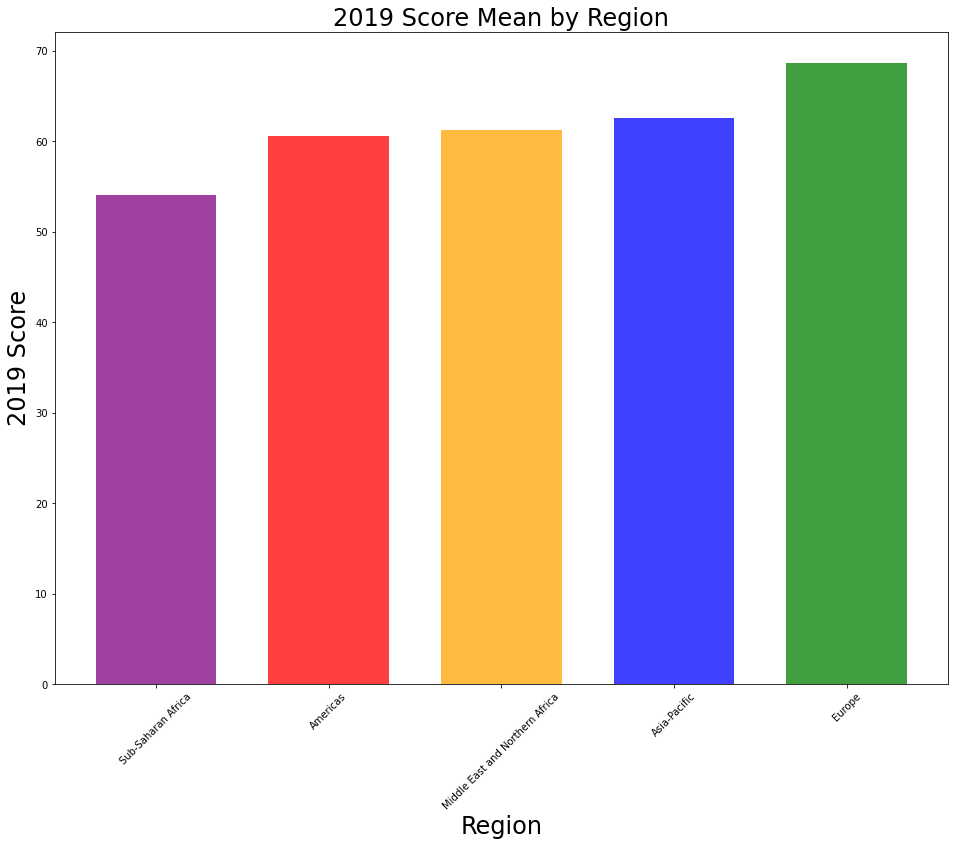

In [587]:
#colors = {'Americas':'red', 'Europe':'green', 'Asia-Pacific':'blue', 'Middle East and North Africa': 'orange','Sub-Saharan Africa': 'purple'}

plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
plt.bar(region_lst, mean_2019_score ,width = .7, alpha = .75, color = ['purple','red','orange','blue','green'])

plt.title('2019 Score Mean by Region', fontsize = 24)
plt.xlabel('Region', fontsize = 24)
plt.ylabel('2019 Score', fontsize = 24)


```data = [ssa_data['2019 Score'],  america_data['2019 Score'], asia_data['2019 Score'], mena_data['2019 Score'], europe_data['2019 Score'],]

plt.boxplot(data)```

```
from scipy.stats import ttest_ind

cat1 = my_data[efi_df['2019 Score']=='cat1']
cat2 = my_data[efi_df['']=='cat2']

ttest_ind(cat1['values'], cat2['values'])
>>> (1.4927289925706944, 0.16970867501294376)
```

In [207]:
from scipy.stats import ttest_ind

americas = efi_df[(efi_df['Region'] == 'Americas')]
mid_east = efi_df[(efi_df['Region'] == 'Middle East and North Africa')]
asia_pac = efi_df[(efi_df['Region'] == 'Asia-Pacific')]
ss_africa = efi_df[(efi_df['Region'] == 'Sub-Saharan Africa')]
europe = efi_df[(efi_df['Region'] == 'Europe')]

regions = [americas, europe, asia_pac, mid_east, ss_africa]

ttest_ind(americas['Property Rights'][efi_df['Property Category'] == 'high'], europe['Property Rights'][efi_df['Property Category'] == 'high'])



Ttest_indResult(statistic=-1.6594461754626382, pvalue=0.105479918847938)

In [211]:
for region1 in regions:
    for region2 in regions:
        for cat1 in cat_lst:
            for cat2 in cat_lst:
                print(region1.Region.iloc[0], cat1, region2.Region.iloc[0], cat2)
                print(ttest_ind(region1['Property Rights'][efi_df['Property Category'] == cat1], region2['Property Rights'][efi_df['Property Category'] == cat2]))




Americas high Americas high
Ttest_indResult(statistic=0.0, pvalue=1.0)
Americas high Americas middle
Ttest_indResult(statistic=5.322942391033985, pvalue=3.884517566937241e-05)
Americas high Americas low
Ttest_indResult(statistic=7.0021371330832265, pvalue=6.226860689896986e-06)
Americas middle Americas high
Ttest_indResult(statistic=-5.322942391033985, pvalue=3.884517566937241e-05)
Americas middle Americas middle
Ttest_indResult(statistic=0.0, pvalue=1.0)
Americas middle Americas low
Ttest_indResult(statistic=5.367798947311699, pvalue=2.528319278543602e-05)
Americas low Americas high
Ttest_indResult(statistic=-7.0021371330832265, pvalue=6.226860689896986e-06)
Americas low Americas middle
Ttest_indResult(statistic=-5.367798947311699, pvalue=2.528319278543602e-05)
Americas low Americas low
Ttest_indResult(statistic=0.0, pvalue=1.0)
Americas high Europe high
Ttest_indResult(statistic=-1.6594461754626382, pvalue=0.105479918847938)
Americas high Europe middle
Ttest_indResult(statistic=4.952

Middle East and North Africa low Americas low
Ttest_indResult(statistic=0.9501565157607796, pvalue=0.36244224067527653)
Middle East and North Africa high Europe high
Ttest_indResult(statistic=-0.8296577242500547, pvalue=0.4125197418302281)
Middle East and North Africa high Europe middle
Ttest_indResult(statistic=5.467432501565393, pvalue=0.00014357637899178958)
Middle East and North Africa high Europe low
Ttest_indResult(statistic=nan, pvalue=nan)
Middle East and North Africa middle Europe high
Ttest_indResult(statistic=-5.455888039799939, pvalue=3.7096651655393702e-06)
Middle East and North Africa middle Europe middle
Ttest_indResult(statistic=0.9713146873214288, pvalue=0.3478750415824804)
Middle East and North Africa middle Europe low
Ttest_indResult(statistic=nan, pvalue=nan)
Middle East and North Africa low Europe high
Ttest_indResult(statistic=-8.574592892456597, pvalue=5.125079585776002e-10)
Middle East and North Africa low Europe middle
Ttest_indResult(statistic=-7.9432585910149

In [616]:
for region1 in regions:
    for region2 in regions:
            print(region1.Region.iloc[0] , region2.Region.iloc[0])
            print(ttest_ind(region1['Property Rights'], region2['Property Rights']))



Americas Americas
Ttest_indResult(statistic=0.0, pvalue=1.0)
Americas Europe
Ttest_indResult(statistic=-5.823506094581901, pvalue=1.5435551878681082e-07)
Americas Asia-Pacific
Ttest_indResult(statistic=-1.61534599517176, pvalue=0.11086655352711301)
Americas Middle East and North Africa
Ttest_indResult(statistic=-1.019617538286912, pvalue=0.31374744544096383)
Americas Sub-Saharan Africa
Ttest_indResult(statistic=3.049012284620521, pvalue=0.0031840928856749903)
Europe Americas
Ttest_indResult(statistic=5.823506094581901, pvalue=1.5435551878681082e-07)
Europe Europe
Ttest_indResult(statistic=0.0, pvalue=1.0)
Europe Asia-Pacific
Ttest_indResult(statistic=3.9434689434568186, pvalue=0.00016977781341200664)
Europe Middle East and North Africa
Ttest_indResult(statistic=3.6308364165438194, pvalue=0.0006208577094817394)
Europe Sub-Saharan Africa
Ttest_indResult(statistic=11.872085492147733, pvalue=6.850485193502608e-20)
Asia-Pacific Americas
Ttest_indResult(statistic=1.61534599517176, pvalue=0.1

In [618]:
for region1 in regions:
    for region2 in regions:
            print(region1.Region.iloc[0] , region2.Region.iloc[0])
            print(ttest_ind(region1['Business Freedom'], region2['Business Freedom']))

Americas Americas
Ttest_indResult(statistic=0.0, pvalue=1.0)
Americas Europe
Ttest_indResult(statistic=-4.4400613953095975, pvalue=3.229394432559799e-05)
Americas Asia-Pacific
Ttest_indResult(statistic=-1.4591330212329974, pvalue=0.1491326342891752)
Americas Middle East and North Africa
Ttest_indResult(statistic=-1.1054030904496386, pvalue=0.27527707267091844)
Americas Sub-Saharan Africa
Ttest_indResult(statistic=4.083219888119205, pvalue=0.00011118447932692013)
Europe Americas
Ttest_indResult(statistic=4.4400613953095975, pvalue=3.229394432559799e-05)
Europe Europe
Ttest_indResult(statistic=0.0, pvalue=1.0)
Europe Asia-Pacific
Ttest_indResult(statistic=2.2558757700282355, pvalue=0.026774527218668718)
Europe Middle East and North Africa
Ttest_indResult(statistic=2.5452200104055662, pvalue=0.013755393887128124)
Europe Sub-Saharan Africa
Ttest_indResult(statistic=9.92262035629387, pvalue=5.815433245171889e-16)
Asia-Pacific Americas
Ttest_indResult(statistic=1.4591330212329974, pvalue=0.1

In [620]:
for region1 in regions:
    for region2 in regions:
            print(region1.Region.iloc[0] , region2.Region.iloc[0])
            print(ttest_ind(region1['Judical Effectiveness'], region2['Judical Effectiveness']))

Americas Americas
Ttest_indResult(statistic=0.0, pvalue=1.0)
Americas Europe
Ttest_indResult(statistic=-4.1466965429957785, pvalue=9.211651351733469e-05)
Americas Asia-Pacific
Ttest_indResult(statistic=-1.6766306447478967, pvalue=0.09820663501833639)
Americas Middle East and North Africa
Ttest_indResult(statistic=-2.0548888759642177, pvalue=0.04614453125173712)
Americas Sub-Saharan Africa
Ttest_indResult(statistic=1.1894233089353856, pvalue=0.23807559709521253)
Europe Americas
Ttest_indResult(statistic=4.1466965429957785, pvalue=9.211651351733469e-05)
Europe Europe
Ttest_indResult(statistic=0.0, pvalue=1.0)
Europe Asia-Pacific
Ttest_indResult(statistic=2.2807539981266376, pvalue=0.025190135872740705)
Europe Middle East and North Africa
Ttest_indResult(statistic=1.038018981694561, pvalue=0.3038033193304171)
Europe Sub-Saharan Africa
Ttest_indResult(statistic=6.909816130644621, pvalue=7.637400151658178e-10)
Asia-Pacific Americas
Ttest_indResult(statistic=1.6766306447478967, pvalue=0.0982

Property Rights show they are not signigificant 
Bon correction
alpha/n
